<a href="https://colab.research.google.com/github/Imran012x/hilsha/blob/main/Transfer_models%5BEternalBit%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")

#Data Preprocessing

In [3]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_fish_224_11k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

#Data Visualization

Key Points:

1.Class Distribution: Shows how balanced or imbalanced your dataset is.


2.Sample Images: Gives a visual representation of each class.


3.Image Size Distribution: Helps to identify if resizing is needed for model consistency.


4.Pixel Intensity: Analyzes the distribution of pixel intensities to understand image brightness and contrast.


5.PCA Visualization: A powerful way to reduce the dimensionality of high-dimensional data and see potential clustering among classes.


6.Confusion Matrix: This would be helpful when you have a classification model trained on this dataset, as it visually demonstrates your model’s performance.


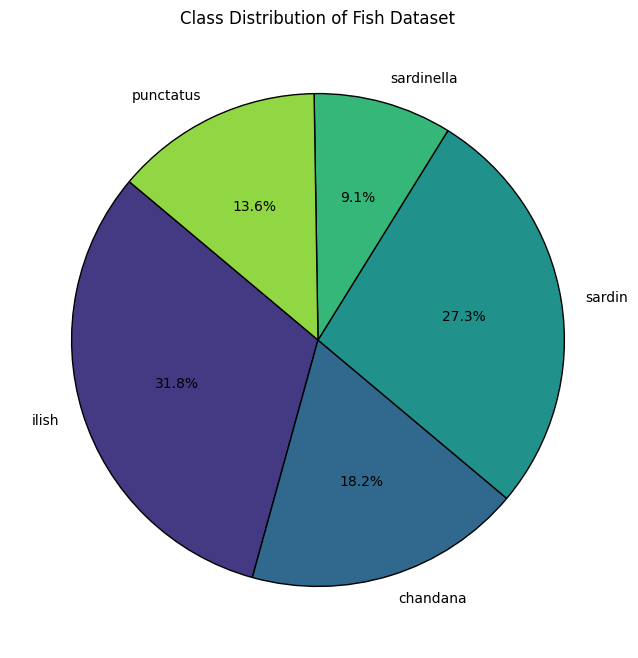

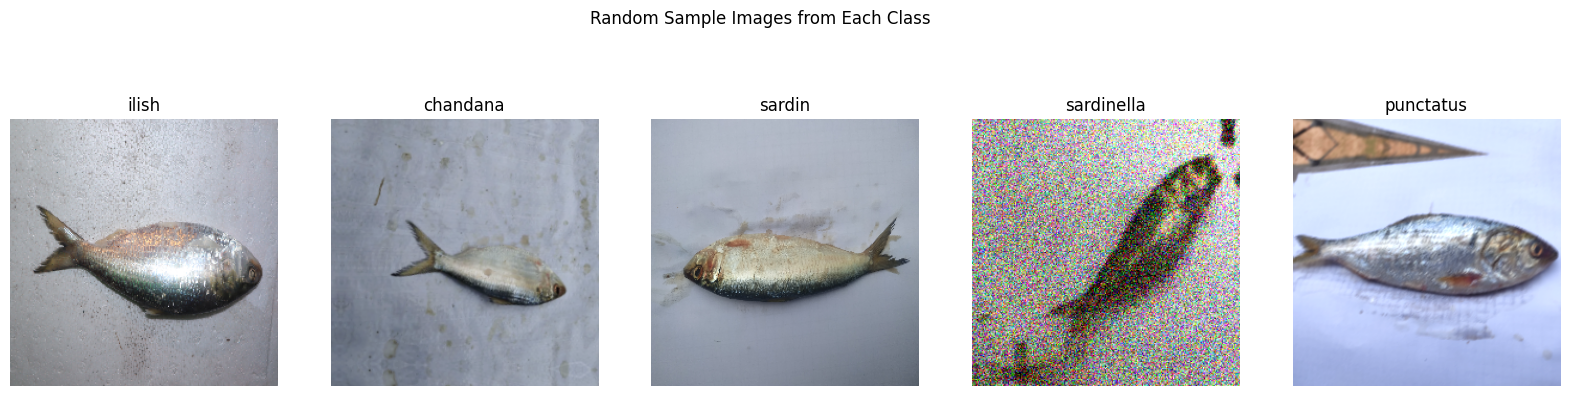

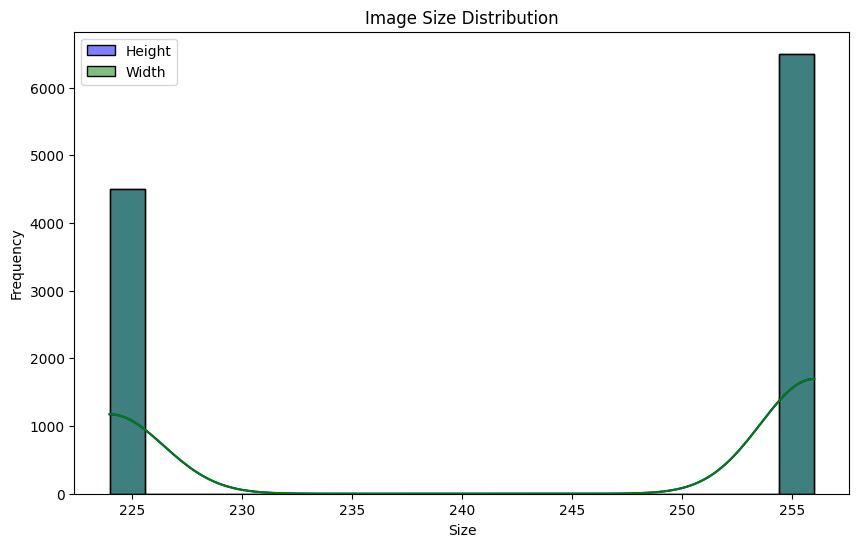

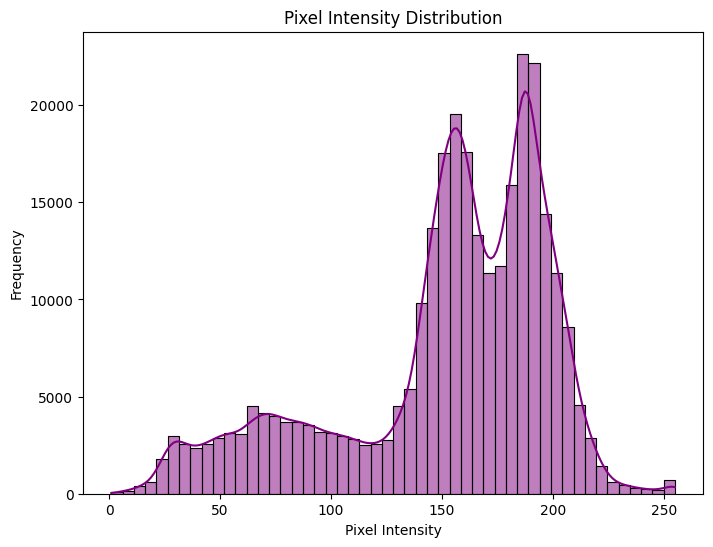

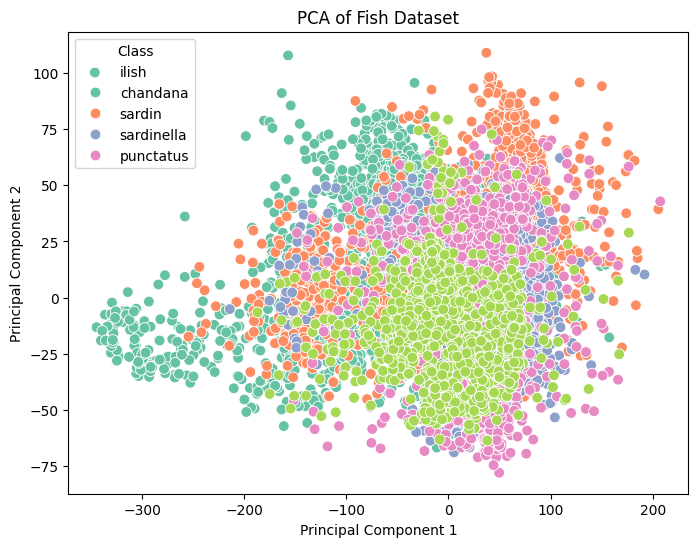

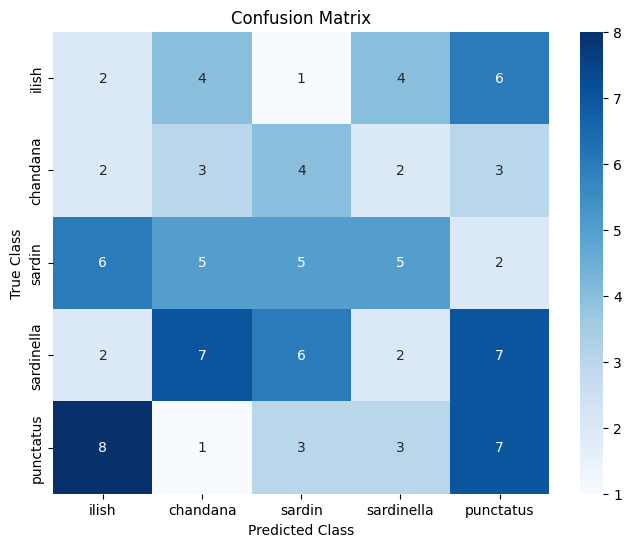

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2

# Assuming 'data' is a directory containing subdirectories for each fish class
data_dir = '/content/' # Change this to your dataset path

# List of class names
classes = ['ilish', 'chandana', 'sardin', 'sardinella', 'punctatus']

# 1. Class Distribution Plot
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", len(class_counts))  # Get a Seaborn color palette
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Class Distribution of Fish Dataset')
plt.show()



# 2. Show Random Sample Images from Each Class
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, class_name in enumerate(classes):
    class_folder = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_folder)
    random_image = random.choice(image_files)
    img = cv2.imread(os.path.join(class_folder, random_image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    axs[i].imshow(img)
    axs[i].set_title(class_name)
    axs[i].axis('off')
plt.suptitle('Random Sample Images from Each Class')
plt.show()

# 3. Image Size Distribution Plot
image_sizes = []
for class_name in classes:
    class_folder = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, image_file))
        image_sizes.append(img.shape[:2])  # height, width

# Plot the image size distribution
image_sizes = np.array(image_sizes)
height = image_sizes[:, 0]
width = image_sizes[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(height, kde=True, label='Height', color='blue', bins=20)
sns.histplot(width, kde=True, label='Width', color='green', bins=20)
plt.title('Image Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 4. Pixel Intensity Distribution Plot
# Load one image per class and analyze pixel intensity
pixels = []
for class_name in classes:
    class_folder = os.path.join(data_dir, class_name)
    random_image = random.choice(os.listdir(class_folder))
    img = cv2.imread(os.path.join(class_folder, random_image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    pixels.extend(img.flatten())  # Add pixel intensities

plt.figure(figsize=(8, 6))
sns.histplot(pixels, kde=True, color='purple', bins=50)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# 5. Principal Component Analysis (PCA) for Dimension Reduction
all_images = []
all_labels = []
for i, class_name in enumerate(classes):
    class_folder = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, image_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img_resized = cv2.resize(img, (64, 64))  # Resize to a fixed size
        all_images.append(img_resized.flatten())
        all_labels.append(i)

# Apply PCA
scaler = StandardScaler()
all_images = np.array(all_images)
all_labels = np.array(all_labels)
all_images_scaled = scaler.fit_transform(all_images)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_images_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=all_labels, palette='Set2', s=60)
plt.title('PCA of Fish Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=classes)
plt.show()

# 6. Confusion Matrix (Example if you have a model trained)
# Assuming you have y_true (true labels) and y_pred (predicted labels)
# Example placeholder (replace this with your actual model predictions and true labels)
y_true = np.random.choice([0, 1, 2, 3, 4], size=100)
y_pred = np.random.choice([0, 1, 2, 3, 4], size=100)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


In [6]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define fish class names and their directories
fish_classes = ['ilish', 'chandana', 'sardin', 'sardinella', 'punctatus']
data_dir = '/content/'  # Base directory containing fish folders

# Define the number of images to select per class
# image_limits = {
#     'ilish': 3500,
#     'chandana': 2000,
#     'sardin': 3000,
#     'sardinella': 1000,
#     'punctatus': 1500
# }

image_limits = {
    'ilish': 2500,
    'chandana': 1500,
    'sardin': 2000,
    'sardinella': 500,
    'punctatus': 500
}


# Function to process images with a limit
def load_images(class_name, max_images):
    image_path = os.path.join(data_dir, class_name)
    images = sorted(os.listdir(image_path))
    random.shuffle(images)  # Shuffle for randomness
    selected_images = images[:max_images]  # Select only the required number

    return [np.array(Image.open(os.path.join(image_path, img)).resize((224, 224)).convert('RGB')) for img in selected_images]

# Load images and labels
data, labels = [], []
for idx, class_name in enumerate(fish_classes):
    class_images = load_images(class_name, image_limits[class_name])  # Apply limit
    data.extend(class_images)
    labels.extend([idx] * len(class_images))

# Convert to numpy arrays
X = np.array(data)
Y = np.array(labels)

# # Split dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

# # Normalize pixel values to [0,1]
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0

# Print dataset information
# print(f"Class counts: {dict(zip(*np.unique(Y, return_counts=True)))}")
# print(f"Shapes - X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")

GPU Available: True
GPU Name: Tesla T4


#Optuna-Hyper parameter Training

In [ ]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [ ]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")










# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Supervised

#Ensemble Learning

#1st - Weighted Average of the Prediction


# Weighted Average Ensemble Method

In the **weighted average** ensemble method, the predictions of multiple models are combined by assigning each model a fixed weight. The final ensemble prediction is computed as a weighted sum of the individual model predictions.

## Mathematical Explanation

Given multiple models \( M_1, M_2, \dots, M_n \) and their corresponding weights \( w_1, w_2, \dots, w_n \), the final prediction \( \hat{y} \) is computed as:

$$
\hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x)
$$

Where:
- \( \hat{y} \) is the final prediction made by the ensemble.
- \( M_1(x), M_2(x), \dots, M_n(x) \) are the predictions from the individual models for the input \( x \).
- \( w_1, w_2, \dots, w_n \) are the fixed weights for each model.

### Example

Let’s assume we have three models: \( M_1, M_2, \) and \( M_3 \) and their predictions for an input \( x \) are as follows:
- \( M_1(x) = 3 \)
- \( M_2(x) = 4 \)
- \( M_3(x) = 5 \)

Let the weights for each model be \( w_1 = 0.2 \), \( w_2 = 0.3 \), and \( w_3 = 0.5 \).

The final ensemble prediction is calculated as:

$$
\hat{y} = 0.2 \cdot 3 + 0.3 \cdot 4 + 0.5 \cdot 5
$$

$$
\hat{y} = 0.6 + 1.2 + 2.5 = 4.3
$$

Thus, the final prediction made by the ensemble model is \( \hat{y} = 4.3 \).

## Benefits of Weighted Average Ensemble

- **Improved Accuracy**: By combining multiple models, the ensemble can often make more accurate predictions compared to individual models. If one model is underperforming, its lower weight will reduce its influence.
- **Diversity of Models**: This method allows combining different models (e.g., decision trees, neural networks, etc.), which brings out the strengths of each model type.
- **Simplicity**: The weighted average method is simple to implement and doesn't require complex architectures, making it a good starting point for ensemble learning.
- **Reduced Overfitting**: By combining multiple models, the ensemble method can help in reducing the risk of overfitting, especially if the individual models are prone to overfitting on their own.

## Conclusion

The weighted average ensemble method is an easy and efficient way to combine predictions from different models by assigning each model a weight. This approach can improve prediction accuracy, reduce overfitting, and harness the diversity of various model types.



Training ResNet50...
Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7433 - loss: 0.7343

220/220 ━━━━━━━━━━━━━━━━━━━━ 75s 174ms/step - accuracy: 0.7438 - loss: 0.7328 - val_accuracy: 0.1244 - val_loss: 1.7855 - learning_rate: 1.0000e-04
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 145ms/step - accuracy: 0.9614 - loss: 0.1219 - val_accuracy: 0.1909 - val_loss: 2.2593 - learning_rate: 1.0000e-04
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9801 - loss: 0.0643 - val_accuracy: 0.4773 - val_loss: 1.9402 - learning_rate: 1.0000e-04
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9883 - loss: 0.0438 - val_accuracy: 0.6352 - val_loss: 1.8173 - learning_rate: 1.0000e-04
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9924 - loss: 0.0269

220/220 ━━━━━━━━━━━━━━━━━━━━ 33s 151ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9511 - val_loss: 0.2086 - learning_rate: 1.0000e-04
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9958 - loss: 0.0159 - val_accuracy: 0.9415 - val_loss: 0.2714 - learning_rate: 1.0000e-04
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9952 - loss: 0.0176

220/220 ━━━━━━━━━━━━━━━━━━━━ 33s 151ms/step - accuracy: 0.9952 - loss: 0.0176 - val_accuracy: 0.9960 - val_loss: 0.0101 - learning_rate: 1.0000e-04
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.9974 - loss: 0.0064 - val_accuracy: 0.9795 - val_loss: 0.0758 - learning_rate: 1.0000e-04
Epoch 9/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.9892 - val_loss: 0.0407 - learning_rate: 1.0000e-04
Epoch 10/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.9944 - loss: 0.0211 - val_accuracy: 0.9801 - val_loss: 0.0552 - learning_rate: 1.0000e-04
ResNet50 validation accuracy: 0.9801
Training InceptionV3...
Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 87s 125ms/step - accuracy: 0.6346 - loss: 0.9939 - val_accuracy: 0.9170 - val_loss: 0.2475 - learning_rate: 1.0000e-04
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9526 - loss: 0.1594 - val_accuracy: 0.9455 - val_loss: 0.1808 - learning_rate: 1.0000e

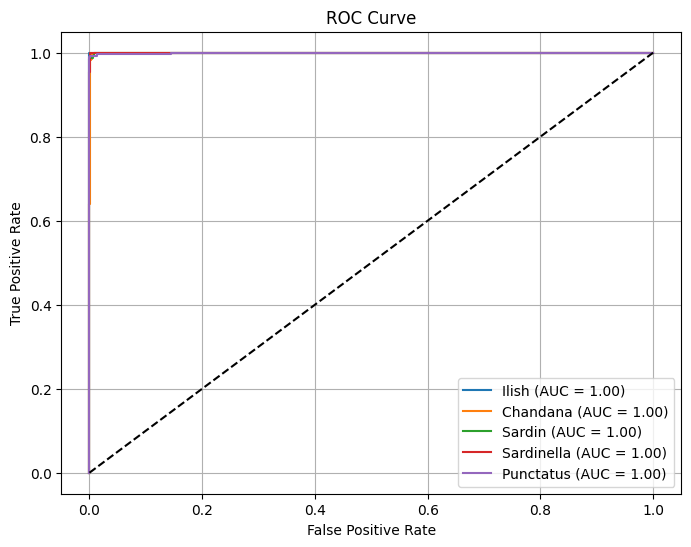

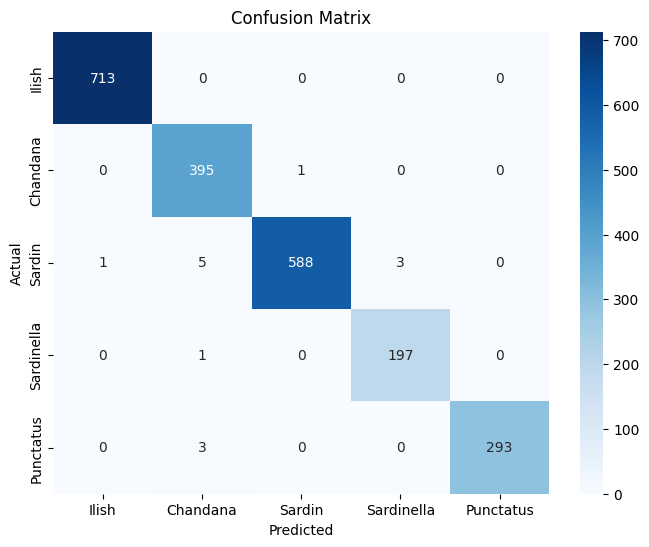

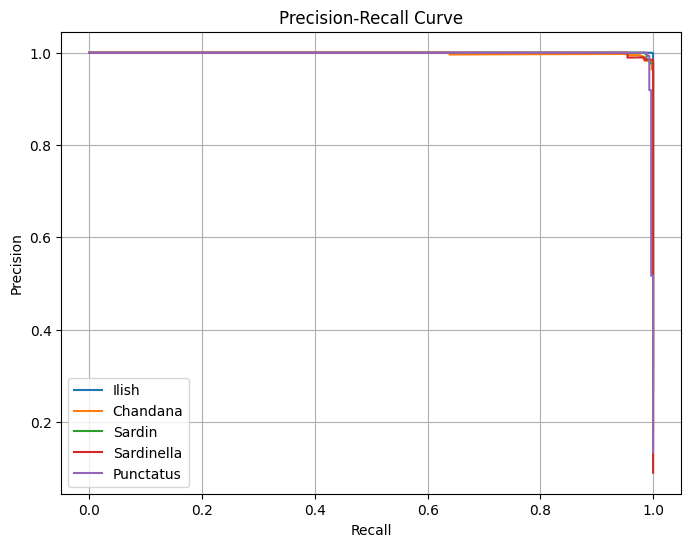

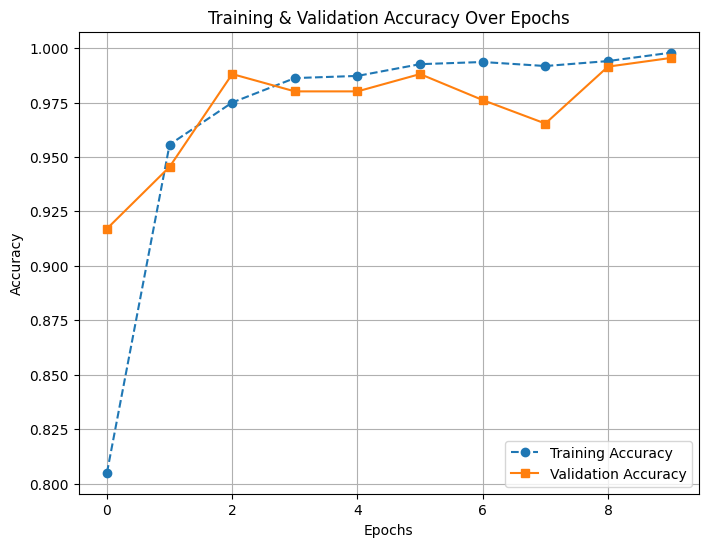

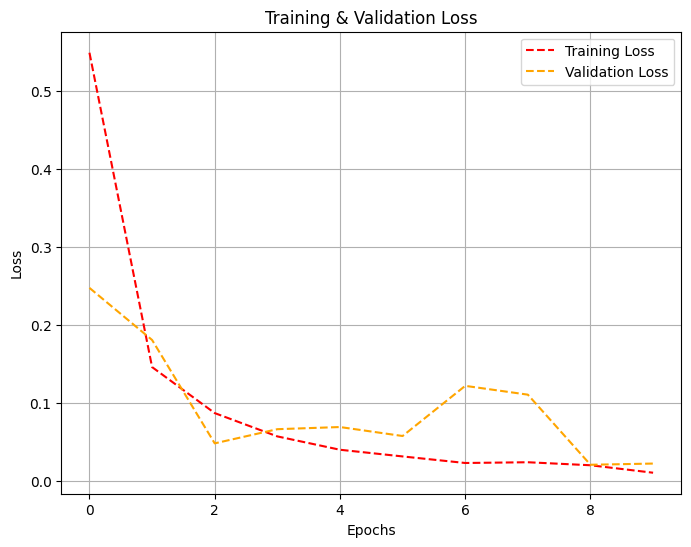

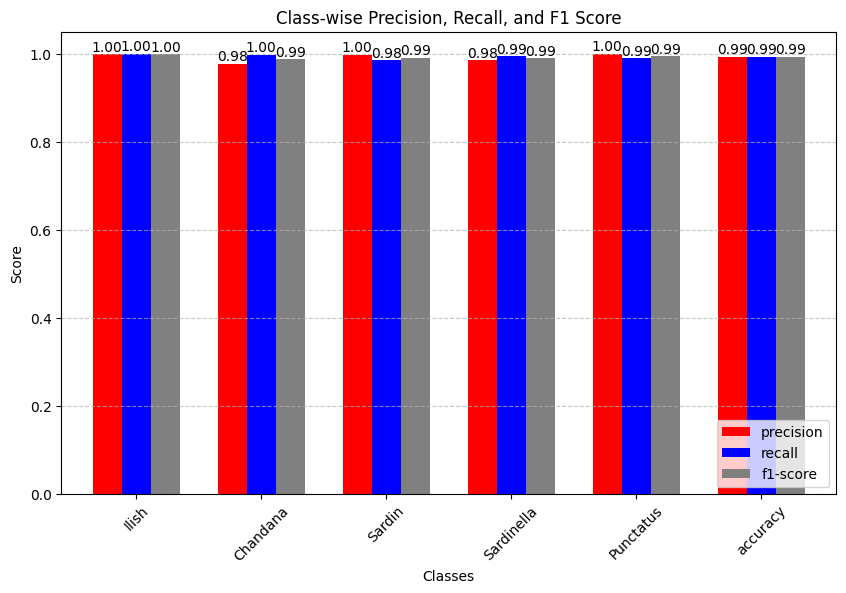


Final Model Performance:
Test Accuracy: 0.9936
F1 Score: 0.9936
Final predictions evaluated.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, classification_report

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    # for layer in base_model.layers[:-10]:
    #     layer.trainable = False
    # for layer in base_model.layers[-10:]:
    #     layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture
models = {
    'ResNet50': create_model(ResNet50),
    'InceptionV3': create_model(InceptionV3)
    # 'EfficientNetB0': create_model(EfficientNetB0)
    # 'VGG16': create_model(VGG16),
    # 'MobileNetV2': create_model(MobileNetV2),
    # 'DenseNet121': create_model(DenseNet121),
    # 'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    history_dict[model_name] = history
    val_accuracy = history.history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(next(iter(predictions_prob.values())))

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")



#Visualization & Analysis
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, accuracy_score, f1_score

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'{class_labels[i]}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid()
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])
    df_report = df_report[['precision', 'recall', 'f1-score']]
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Generate Plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print Final Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")
print("Final predictions evaluated.")


#2nd -Learnable Weighted Average

# Learnable Weighted Average (LWA) Ensemble with ResNet and Inception

## Overview

The **Learnable Weighted Average (LWA)** ensemble technique involves combining predictions from multiple models, where each model contributes based on learned weights. In this case, we are using **ResNet** and **Inception**, two powerful deep learning models, to create an ensemble that leverages their strengths.

- **ResNet**: Known for its ability to learn deep hierarchical features with residual connections, improving the training of very deep models.
- **Inception**: Known for capturing features at multiple scales, allowing it to learn more diverse patterns in the data.

In this approach, we combine the predictions from these models using a **learnable weighted average** where the weights are learned during training. The goal is to optimize these weights such that the final ensemble prediction is the most accurate.

## Mathematical Explanation

Let's assume we have two base models: ResNet and Inception. The predictions from each model are denoted as \( M_1(x) \) and \( M_2(x) \), where \( x \) is the input data (such as an image). The final ensemble prediction \( \hat{y} \) is given by the weighted sum of these predictions:

$$
\hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x)
$$

Where:
- \( M_1(x) \) is the prediction from ResNet,
- \( M_2(x) \) is the prediction from Inception,
- \( w_1 \) and \( w_2 \) are the learned weights that determine how much each model contributes to the final prediction.

### Multi-layered Weight Adjustment

In a more complex setting, where the model has multiple layers, the weights can be adjusted at multiple levels. The formula becomes:

$$
\hat{y} = f(W_L \cdot f(W_{L-1} \cdot \dots f(W_1 \cdot [M_1(x), M_2(x)])) )
$$

Where:
- \( f \) represents the activation functions (e.g., ReLU or sigmoid) applied at each layer.
- \( W_1, W_2, ..., W_L \) are the weights of the layers in the neural network that learns the optimal combination of the base model predictions.
- The input to the network is the concatenation of the predictions \( M_1(x) \) and \( M_2(x) \), and the final output is the ensemble prediction \( \hat{y} \).

## How ResNet and Inception Contribute

1. **ResNet's Contribution**:
   - ResNet excels in deep learning, allowing it to capture high-level, abstract features in the data through residual connections.
   - It is particularly effective for identifying complex patterns and relationships in data that are spread across many layers.

2. **Inception's Contribution**:
   - Inception is designed to capture features at different scales using filters of multiple sizes (e.g., 1x1, 3x3, 5x5).
   - It excels at capturing both local and global patterns, which helps it handle varied data distributions and complexity.

In the LWA ensemble, the predictions from ResNet and Inception are combined with learned weights, which help the model decide how much trust to place in each individual model's prediction.

## Example: Predicting House Prices

Consider the task of predicting house prices using images of the houses. We use **ResNet** and **Inception** as our base models, and the final price is predicted by combining their outputs using the LWA method.

### Step-by-Step:

1. **Step 1: ResNet Prediction**
   - ResNet processes an image of a house and outputs a predicted price, say \( M_1(x) = 300,000 \).

2. **Step 2: Inception Prediction**
   - Inception processes the same image and outputs a different predicted price, say \( M_2(x) = 320,000 \).

3. **Step 3: Learning the Weights**
   - During training, a neural network learns the weights \( w_1 \) and \( w_2 \) that will optimize the final prediction. For example, the network might learn that:
     - \( w_1 = 0.3 \) (ResNet’s contribution is weighted 30%),
     - \( w_2 = 0.7 \) (Inception’s contribution is weighted 70%).

4. **Step 4: Final Ensemble Prediction**
   - The final ensemble prediction is computed as:
   $$
   \hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) = 0.3 \cdot 300,000 + 0.7 \cdot 320,000 = 308,000
   $$

Thus, the ensemble model predicts the house price as **308,000**.

## Code Example with ResNet and Inception

Here’s a code snippet showing how the ensemble model is created using ResNet and Inception as base models:

```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Load ResNet and Inception models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top for ensemble
def create_ensemble_model():
    inputs = Input(shape=(224, 224, 3))

    # ResNet output
    resnet_output = resnet_model(inputs)
    resnet_output = Flatten()(resnet_output)

    # Inception output
    inception_output = inception_model(inputs)
    inception_output = Flatten()(inception_output)

    # Concatenate model predictions
    concatenated = tf.keras.layers.concatenate([resnet_output, inception_output])

    # Final layer to combine predictions
    final_output = Dense(1)(concatenated)

    model = Model(inputs=inputs, outputs=final_output)
    model.compile(optimizer='adam', loss='mse')
    return model

# Create ensemble model
ensemble_model = create_ensemble_model()

# Example training data
X_train = np.random.randn(100, 224, 224, 3)  # Random images
y_train = np.random.randn(100)  # Random house prices

# Train the model
ensemble_model.fit(X_train, y_train, epochs=10)

# Example prediction
X_test = np.random.randn(10, 224, 224, 3)  # Random test images
predictions = ensemble_model.predict(X_test)

print("Ensemble Predictions:", predictions)



### Benefits Section:
**LWA** technique with **ResNet** and **Inception**:
- **Improved Accuracy**: By combining models with different strengths, the ensemble model improves the overall prediction accuracy.
- **Better Generalization**: The ensemble model learns the optimal contribution of each base model, ensuring better performance on unseen data.
- **Flexibility in Learning**: The ensemble can adjust the contribution of each model during training, ensuring adaptability to the dataset.
- **Increased Robustness**: By combining multiple models, the ensemble reduces the chance of overfitting and performs better on varied data.
- **Handling Complex Patterns**: The combination of ResNet’s deep feature extraction and Inception’s multi-scale feature extraction ensures the model can handle a wide range of data complexities.



# Difference between Learnable Weighted Average vs Weighted Average

In ensemble learning, both **Learnable Weighted Average** and **Weighted Average** methods aim to combine the predictions of multiple models. However, there are key differences in how the weights are assigned and optimized.

## 1. **Weighted Average**

### Definition:
In the **Weighted Average** method, a fixed weight is assigned to each model. These weights are predetermined and do not change during training or inference.

### Mathematical Explanation:
Given multiple models \( M_1, M_2, \dots, M_n \) and their fixed weights \( w_1, w_2, \dots, w_n \), the final prediction \( \hat{y} \) is computed as:

$$
\hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x)
$$

Where:
- \( \hat{y} \) is the final prediction made by the ensemble.
- \( M_1(x), M_2(x), \dots, M_n(x) \) are the predictions from the individual models for the input \( x \).
- \( w_1, w_2, \dots, w_n \) are the fixed weights for each model.

The weights \( w_1, w_2, \dots, w_n \) are manually chosen or set based on some pre-defined rule, such as performance metrics from cross-validation or expert knowledge.

### Advantages:
- **Simplicity**: Easy to implement and understand.
- **Fixed Weights**: The method does not require additional training of the weights, making it faster to implement.

### Disadvantages:
- **Limited Adaptability**: Since the weights are fixed, the method does not adapt to changing patterns in the data or optimize the weights during training.
- **Static Performance**: If one model is underperforming, its influence on the final prediction cannot be adjusted dynamically.

---

## 2. **Learnable Weighted Average**

### Definition:
In the **Learnable Weighted Average** method, the weights for combining the models' predictions are treated as learnable parameters. These weights are optimized during training, usually using gradient descent or other optimization techniques.

### Mathematical Explanation:
Given multiple models \( M_1, M_2, \dots, M_n \) and their learnable weights \( w_1, w_2, \dots, w_n \), the final prediction \( \hat{y} \) is computed as:

$$
\hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x)
$$

Where:
- \( \hat{y} \) is the final prediction made by the ensemble.
- \( M_1(x), M_2(x), \dots, M_n(x) \) are the predictions from the individual models for the input \( x \).
- \( w_1, w_2, \dots, w_n \) are the learnable weights for each model.

The key difference is that the weights \( w_1, w_2, \dots, w_n \) are initialized randomly and then optimized during training based on the loss function, typically using backpropagation or some other gradient-based method.

### Advantages:
- **Adaptability**: The weights are adjusted based on the training data, allowing the ensemble to adapt to the dataset and optimize for better performance.
- **Dynamic Optimization**: If one model is underperforming, its weight can decrease over time, reducing its influence on the final prediction.
- **Potential for Higher Accuracy**: The ability to learn the optimal weights can lead to improved ensemble performance over time.

### Disadvantages:
- **Increased Complexity**: Requires more computational resources and time to train, as the weights need to be learned alongside the models.
- **Risk of Overfitting**: Since the weights are learned during training, there is a possibility of overfitting the ensemble to the training data if not regularized properly.

---

## Key Differences:

| **Aspect**                     | **Weighted Average**                       | **Learnable Weighted Average**             |
|---------------------------------|--------------------------------------------|--------------------------------------------|
| **Weight Assignment**           | Fixed weights, predefined or manually set  | Weights are learned during training        |
| **Optimization**                | No optimization of weights during training | Weights are optimized via gradient descent |
| **Adaptability**                | Static, no adaptation during training      | Dynamic, adapts to the dataset             |
| **Complexity**                  | Simple and fast                           | More complex, requires training time      |
| **Risk of Overfitting**         | Lower risk of overfitting                 | Higher risk of overfitting                |
| **Performance**                 | May be less accurate                      | Potentially more accurate with proper training |

## Conclusion

- **Weighted Average** is best when simplicity and speed are required, and the model predictions are relatively stable.
- **Learnable Weighted Average** is more suitable when the model performance needs to be optimized dynamically, and the training allows for greater flexibility and adaptability.

# Mathematical Difference Between Learnable Weighted Average vs Weighted Average

The key difference between **Weighted Average** and **Learnable Weighted Average** lies in how the weights are handled. Below is the mathematical explanation of both methods:

## 1. **Weighted Average** (Static Weights)

In the **Weighted Average** method, the weights \( w_1, w_2, \dots, w_n \) are **fixed** and pre-determined. These weights do not change during training and are typically set manually based on model performance or domain knowledge.

### Formula:
Given multiple models \( M_1, M_2, \dots, M_n \), and their fixed weights \( w_1, w_2, \dots, w_n \), the final prediction \( \hat{y} \) is computed as:

$$
\hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x)
$$

Where:
- \( \hat{y} \) is the final prediction made by the ensemble.
- \( M_1(x), M_2(x), \dots, M_n(x) \) are the predictions from individual models for input \( x \).
- \( w_1, w_2, \dots, w_n \) are **fixed** weights, predefined or manually chosen.

### Characteristics:
- The weights are **static** and **fixed** during both training and prediction.
- The ensemble does not adapt to the performance of individual models during training.

---

## 2. **Learnable Weighted Average** (Dynamic Weights)

In the **Learnable Weighted Average** method, the weights \( w_1, w_2, \dots, w_n \) are **learnable parameters** that are **optimized** during training. These weights change as the training progresses to minimize the loss function.

### Formula:
Given multiple models \( M_1, M_2, \dots, M_n \), and their learnable weights \( w_1, w_2, \dots, w_n \), the final prediction \( \hat{y} \) is computed as:

$$
\hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x)
$$

Where:
- \( \hat{y} \) is the final prediction made by the ensemble.
- \( M_1(x), M_2(x), \dots, M_n(x) \) are the predictions from individual models for input \( x \).
- \( w_1, w_2, \dots, w_n \) are **learnable** weights, which are **optimized** during training.

### Characteristics:
- The weights \( w_1, w_2, \dots, w_n \) are **initialized randomly** and then updated during training using an optimization technique like **gradient descent**.
- The ensemble adapts the weights based on the model's performance on the training data, allowing it to improve over time.

---

## Key Mathematical Difference:

The **mathematical difference** lies in the way the weights are handled:
- In **Weighted Average**, the weights \( w_1, w_2, \dots, w_n \) are **fixed** and do not change during training.
  
  $$ \hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x) \quad \text{(Fixed \( w_1, w_2, \dots, w_n \))} $$

- In **Learnable Weighted Average**, the weights \( w_1, w_2, \dots, w_n \) are **learned** during training and updated based on the model's performance.

  $$ \hat{y} = w_1 \cdot M_1(x) + w_2 \cdot M_2(x) + \dots + w_n \cdot M_n(x) \quad \text{(Learned \( w_1, w_2, \dots, w_n \))} $$

### **Optimization of Weights:**

- **Weighted Average**: No optimization of the weights. The weights are static and fixed before training.
- **Learnable Weighted Average**: The weights \( w_1, w_2, \dots, w_n \) are learned by an optimization algorithm (e.g., gradient descent) to minimize the loss function.

---

## Example of Learnable Weight Optimization:

Let's assume we are using 3 models, \( M_1, M_2, M_3 \), and we initialize the weights as:

$$ w_1 = 0.2, \, w_2 = 0.3, \, w_3 = 0.5 $$

During training, the optimization process (e.g., gradient descent) will adjust these weights to improve the model's performance. After several iterations, the weights may change to:

$$ w_1 = 0.1, \, w_2 = 0.4, \, w_3 = 0.5 $$

Thus, the final prediction \( \hat{y} \) could be updated as:

$$ \hat{y} = 0.1 \cdot M_1(x) + 0.4 \cdot M_2(x) + 0.5 \cdot M_3(x) $$

---

## Conclusion:

The main mathematical difference is that the **weights in Weighted Average** are **static and fixed**, while in the **Learnable Weighted Average**, the weights are **learned dynamically** during training to optimize the performance of the ensemble.



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold



#SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter
# Assuming X and Y are your image data and labels
# X: image data (e.g., shape=(n_samples, height, width, channels)), Y: labels (0,1,2,3,4 for the 5 classes)

# Split original dataset into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Flatten the image data (from 4D to 2D)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
Y_train_reshaped = Y_train.reshape(Y_train.shape[0], -1)

# Apply SMOTE on training data only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_reshaped, Y_train_reshaped)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Reshape X_train_resampled and X_test to have the shape (n_samples, 224, 224, 3)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
X_test_resampled = X_test.reshape(-1, 224, 224, 3)
# Y_train_resampled = Y_train_resampled.reshape(-1, 224, 224, 3)

# Normalize pixel values to [0,1]
X_train_scaled = X_train_resampled / 255.0
X_test_scaled = X_test_resampled / 255.0

print(f"Shape of X_train_resampled: {X_train_resampled.shape}")  # Check the new shape
print(f"Shape of X_test_resampled: {X_test_resampled.shape}")  # Check the new shape




#Train
# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)





# # Function to create a model with optimizations
# def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
#     base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256)(x)
#     x = BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = Dropout(0.5)(x)
#     output = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     model.compile(optimizer=RMSprop(learning_rate=1e-4),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model


# # Create models for each architecture
# models = {
#     'ResNet50': create_model(ResNet50),
#     'InceptionV3': create_model(InceptionV3)
#     # 'EfficientNetB0': create_model(EfficientNetB0)
#     # 'VGG16': create_model(VGG16),
#     # 'MobileNetV2': create_model(MobileNetV2),
#     # 'DenseNet121': create_model(DenseNet121),
#     # 'Xception': create_model(Xception)
# }





from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.layers import Concatenate, Lambda, Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np

# Load pre-trained models (you can also load your custom models)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define an ensemble model
def create_ensemble_model(model1, model2, input_shape=(224, 224, 3), num_classes=5):
    # Renaming layers to avoid conflicts between models
    for layer in model1.layers:
        layer._name = f"resnet_{layer.name}"  # Rename layers for ResNet
    for layer in model2.layers:
        layer._name = f"inception_{layer.name}"  # Rename layers for Inception

    # Define the input layer that will be used for both models
    input_layer = Input(shape=input_shape)

    # Get the output from both models
    output1 = model1(input_layer)
    output2 = model2(input_layer)

    # Apply Global Average Pooling to reduce the dimensionality of the feature maps
    output1 = GlobalAveragePooling2D()(output1)
    output2 = GlobalAveragePooling2D()(output2)

    # Learnable weighted averaging
    alpha = tf.Variable(0.5, trainable=True, dtype=tf.float32, name="alpha")  # Learnable weight
    ensemble_output = Lambda(lambda x: alpha * x[0] + (1 - alpha) * x[1])([output1, output2])

    # Additional dense layers for improved performance
    x = Dense(128, activation='relu')(ensemble_output)
    x = Dropout(0.5)(x)
    final_output = Dense(num_classes, activation='softmax')(x)

    # Create ensemble model
    ensemble_model = Model(inputs=input_layer, outputs=final_output)

    # Compile the model
    ensemble_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    return ensemble_model

# Create ensemble model using pre-defined ResNet and Inception models
ensemble_model = create_ensemble_model(resnet_model, inception_model)  # Replace with actual model variables

# Print model summary to verify
ensemble_model.summary()

# Implement Stratified K-Fold Cross-Validation
k_folds = 3  # Number of folds
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

history_dict = {}
model_accuracies = {}

# List of model names for reference
model_names = ['EnsembleModel']

# Create callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Function to create generators for image data
import tensorflow as tf

# Function to create dual generators for image data
def create_dual_generator(X, Y, batch_size=32):
    def generator():
        datagen = ImageDataGenerator()  # Normalize images
        flow = datagen.flow(X, Y, batch_size=batch_size)

        # Yield a tuple of (input for model1, input for model2), both being the same data for now
        while True:
            x, y = next(flow)  # Use next() instead of generator.next()
            yield ([x, x], y)  # Feed the same x for both models

    return generator



# Function to convert generator into tf.data.Dataset for correct output signature
def create_tf_dataset(generator_func):
    output_signature = (
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),  # Input shape for model1 and model2
        tf.TensorSpec(shape=(None,), dtype=tf.int64)  # Label shape
    )
    return tf.data.Dataset.from_generator(generator_func, output_signature=output_signature)






# Iterate through K-Folds
for model_name in model_names:
    fold_no = 1
    history_dict[model_name] = []

    for train_index, val_index in skf.split(X_train_scaled, Y_train_resampled):
        print(f"\nTraining {model_name} - Fold {fold_no}/{k_folds}...")

        # Split dataset into training and validation sets
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        Y_train_fold, Y_val_fold = Y_train_resampled[train_index], Y_train_resampled[val_index]

        # Create generators for training and validation
        train_generator = create_dual_generator(X_train_fold, Y_train_fold)
        val_generator = create_dual_generator(X_val_fold, Y_val_fold)

        # Convert generators to tf.data.Dataset
        train_dataset = create_tf_dataset(train_generator)
        val_dataset = create_tf_dataset(val_generator)

        # Train ensemble model with the tf.data.Dataset
        history = ensemble_model.fit(
            train_dataset,
            epochs=5,
            verbose=1,
            validation_data=val_dataset,
            steps_per_epoch=len(X_train_fold) // 32,  # Number of steps per epoch (based on batch size)
            validation_steps=len(X_val_fold) // 32,  # Number of steps for validation
            callbacks=[checkpoint, earlystop, reduce_lr]
        )

        # Store history
        history_dict[model_name].append(history.history)

        # Compute validation accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Fold {fold_no} - {model_name} Validation Accuracy: {val_accuracy:.4f}")

        fold_no += 1

# After training, you can evaluate the model on test data or save it for future use
ensemble_model.save('final_ensemble_model.h5')










# Plot Accuracy & Loss Graph for Each Fold
def plot_kfold_results(history_dict, metric):
    plt.figure(figsize=(12, 6))
    for model_name, histories in history_dict.items():
        for i, history in enumerate(histories):
            plt.plot(history[metric], label=f"{model_name} - Fold {i+1}")

    plt.title(f"{metric.capitalize()} per Epoch (K-Fold)")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()
    plt.grid(True)


# Plot graphs
plot_kfold_results(history_dict, "accuracy")
plot_kfold_results(history_dict, "val_accuracy")
plot_kfold_results(history_dict, "loss")
plot_kfold_results(history_dict, "val_loss")



#Visualization & Analysis
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, accuracy_score, f1_score

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'{class_labels[i]}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid()
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])
    df_report = df_report[['precision', 'recall', 'f1-score']]
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Generate Plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print Final Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")
print("Final predictions evaluated.")

Class distribution after SMOTE: Counter({2: 1600, 0: 1600, 1: 1600, 4: 1600, 3: 1600})
Shape of X_train_resampled: (8000, 224, 224, 3)
Shape of X_test_resampled: (1500, 224, 224, 3)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inception_v3 (Functional) │ (None, 5, 5, 2048)     │     21,802,784 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ inception_v3[0][0]     │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 2048)           │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │        262,272 │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 5)              │            645 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 45,653,413 (174.15 MB)

 Trainable params: 45,565,861 (173.82 MB)

 Non-trainable params: 87,552 (342.00 KB)


Training EnsembleModel - Fold 1/3...
Epoch 1/5


#3rd - Meta Model

# Meta-Model Prediction Process

After the base models (ResNet50 and InceptionV3) make predictions, the output is stacked and passed through the **meta-model** for final prediction. The meta-model is trained to combine the base model predictions into a single prediction.

### Step-by-Step Process

1. **Base Model Predictions**: Each base model (ResNet50 and InceptionV3) generates predictions on the validation data, which are the probabilities for each class:

   - Let $\hat{y}_{\text{ResNet\_preds}}$ be the predictions from the ResNet50 model for a batch of $N$ samples:

   $$
   \hat{y}_{\text{ResNet\_preds}} = \left[\hat{y}_{\text{ResNet}}^{(1)}, \hat{y}_{\text{ResNet}}^{(2)}, \dots, \hat{y}_{\text{ResNet}}^{(N)}\right]
   $$

   - Similarly, let $\hat{y}_{\text{Inception\_preds}}$ be the predictions from the InceptionV3 model for the same batch:

   $$
   \hat{y}_{\text{Inception\_preds}} = \left[\hat{y}_{\text{Inception}}^{(1)}, \hat{y}_{\text{Inception}}^{(2)}, \dots, \hat{y}_{\text{Inception}}^{(N)}\right]
   $$

2. **Stacking Base Model Predictions**: The predictions from both models are concatenated to form a combined feature vector for each sample:

   $$
   \hat{y}_{\text{stacked}}^{(i)} = \left[\hat{y}_{\text{ResNet}}^{(i)}, \hat{y}_{\text{Inception}}^{(i)}\right]
   $$

   Where $\hat{y}_{\text{stacked}}^{(i)}$ is the combined prediction vector for the $i$-th sample.

   - The stacked prediction for all $N$ samples becomes:

   $$
   \hat{Y}_{\text{stacked}} = \left[\hat{y}_{\text{stacked}}^{(1)}, \hat{y}_{\text{stacked}}^{(2)}, \dots, \hat{y}_{\text{stacked}}^{(N)}\right]
   $$

3. **Meta-Model Input**: The stacked predictions are used as input to the meta-model. The meta-model receives the combined feature vectors $\hat{y}_{\text{stacked}}^{(i)}$.

4. **Meta-Model Architecture**: The meta-model takes the stacked vector $\hat{y}_{\text{stacked}}^{(i)}$ as input and processes it through several dense layers:

   $$
   x = \text{Dense}(128, \text{activation='relu'})(\hat{y}_{\text{stacked}}^{(i)})
   $$

   $$
   x = \text{Dropout}(0.5)(x)
   $$

   $$
   x = \text{Dense}(64, \text{activation='relu'})(x)
   $$

   Finally, the output layer predicts the class probabilities using softmax activation:

   $$
   \hat{y}_{\text{final}}^{(i)} = \text{Softmax}(x)
   $$

   Where $\hat{y}_{\text{final}}^{(i)}$ is the predicted class probabilities for the $i$-th sample.

### Example

For a single sample $i$:

1. Suppose the predictions from the base models are as follows:

   - ResNet50 prediction: $\hat{y}_{\text{ResNet}}^{(i)} = [0.1, 0.3, 0.2, 0.1, 0.3]$
   - InceptionV3 prediction: $\hat{y}_{\text{Inception}}^{(i)} = [0.2, 0.4, 0.1, 0.1, 0.2]$

2. The stacked prediction for sample $i$ becomes:

   $$
   \hat{y}_{\text{stacked}}^{(i)} = [0.1, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.2]
   $$

3. This stacked vector is passed to the meta-model, which processes it and outputs the final prediction (after dense layers and softmax activation):

   $$
   \hat{y}_{\text{final}}^{(i)} = \text{Softmax}(x) = [0.25, 0.2, 0.1, 0.2, 0.25]
   $$

   These are the predicted class probabilities for sample $i$.

### Benefits of Using a Meta-Model

1. **Improved Accuracy**: By combining the predictions of multiple models, the meta-model can leverage the strengths of each base model and reduce the risk of overfitting or underfitting, improving overall accuracy.

2. **Robustness to Overfitting**: The meta-model helps to prevent overfitting, as it combines the output of several models, which are less likely to overfit in the same way as a single model might.

3. **Diversity of Base Models**: Using different architectures, such as ResNet50 and InceptionV3, introduces diversity into the model ensemble. This allows the meta-model to learn a more generalized decision boundary, as different models may capture different patterns in the data.

4. **Handling Imbalanced Data**: The meta-model can also help in handling class imbalance better. Since it takes predictions from multiple models, it can learn to focus on the features that the different models might have missed, leading to improved performance on underrepresented classes.

5. **Ensemble Learning Power**: The meta-model is an example of **stacking**, a type of ensemble learning, which is known for boosting the performance of machine learning models by combining predictions from multiple models rather than relying on a single model.

### Conclusion

The meta-model uses the stacked predictions from the base models to generate a final output. The output is a probability distribution over the possible classes, where the class with the highest probability is chosen as the predicted label.

This technique leverages the power of ensemble learning, offering enhanced predictive performance and improved generalization.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator






# Assuming X and Y are already loaded and preprocessed as numpy arrays
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalize data
X_train_scaled = X_train
X_test_scaled = X_test

# Apply SMOTE to balance classes on the labels (not on flattened data)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled.reshape(X_train_scaled.shape[0], -1), Y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Reshape back to image format
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)








# Define base model functions
def create_base_model(input_shape=(224, 224, 3), model_type='ResNet'):
    if model_type == 'ResNet':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_type == 'Inception':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze the last 10 layers
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Add custom layers with Batch Normalization and Leaky ReLU
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # First dense layer with Batch Normalization and Leaky ReLU
    x = Dense(256)(x)
    x = BatchNormalization()(x)  # Add BatchNormalization after the Dense layer
    x = LeakyReLU(alpha=0.1)(x)  # LeakyReLU with alpha = 0.1
    x = Dropout(0.5)(x)  # Dropout rate 0.5

    # Second dense layer with Batch Normalization and Leaky ReLU
    x = Dense(128)(x)
    x = BatchNormalization()(x)  # Add BatchNormalization after the Dense layer
    x = LeakyReLU(alpha=0.1)(x)  # LeakyReLU with alpha = 0.1
    x = Dropout(0.5)(x)  # Dropout rate 0.5

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model






# Create meta-model for stacking
def create_meta_model(input_shape=(256*2,), num_classes=5):
    input_layer = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input_layer)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model










# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Custom batch generator for data
def batch_generator(X, Y, batch_size=32):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            end = min(start + batch_size, size)
            batch_idx = indices[start:end]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]

            # Ensure images are reshaped to (batch_size, 224, 224, 3)
            if len(X_batch.shape) == 3:  # If the shape is (batch_size, 224, 3)
                X_batch = X_batch.reshape(-1, 224, 224, 3)  # Reshape to include 3 channels

            # Apply augmentation using ImageDataGenerator
            # augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))[0]



            # yield augmented_images, Y_batch
            # Yield the batch without augmentation
            yield X_batch, Y_batch









# Train using K-Fold with stacking and data augmentation
def train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test, k=5, batch_size=32, epochs=10):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    histories = []

    # Storing all base model predictions
    base_model_predictions = []

    for train_idx, val_idx in skf.split(X_train_resampled, Y_train_resampled):
        print(f"Training fold {fold_no}/{k}...")

        # Split data into train and validation sets for each fold
        X_train_fold, X_val_fold = X_train_resampled[train_idx], X_train_resampled[val_idx]
        Y_train_fold, Y_val_fold = Y_train_resampled[train_idx], Y_train_resampled[val_idx]

        # Create base models
        resnet_model = create_base_model(input_shape=(224, 224, 3), model_type='ResNet')
        inception_model = create_base_model(input_shape=(224, 224, 3), model_type='Inception')

        # Create generators for training and validation data using the batch generator
        train_generator = batch_generator(X_train_fold, Y_train_fold, batch_size=batch_size)
        val_generator = batch_generator(X_val_fold, Y_val_fold, batch_size=batch_size)

        callbacks = [
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
            ModelCheckpoint(f'best_model_fold_{fold_no}.h5', save_best_only=True, monitor='val_loss', mode='min'),
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        ]










        # Train base models with custom batch generator
        resnet_model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1,
                         callbacks=callbacks, steps_per_epoch=len(X_train_fold)//batch_size,
                         validation_steps=len(X_val_fold)//batch_size)
        inception_model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1,
                             callbacks=callbacks, steps_per_epoch=len(X_train_fold)//batch_size,
                             validation_steps=len(X_val_fold)//batch_size)








        # Get predictions from base models
        resnet_preds = resnet_model.predict(X_val_fold)
        inception_preds = inception_model.predict(X_val_fold)

        # Stack predictions
        stacked_predictions = np.concatenate([resnet_preds, inception_preds], axis=1)
        base_model_predictions.append(stacked_predictions)

        fold_no += 1







    # Prepare stacked data for meta-model
    base_model_predictions = np.concatenate(base_model_predictions, axis=0)

    # Getting class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(Y_train_resampled), y=Y_train_resampled)
    class_weight_dict = dict(zip(np.unique(Y_train_resampled), class_weights))

    # Train meta-model
    meta_model = create_meta_model(input_shape=(base_model_predictions.shape[1],))
    meta_model.fit(base_model_predictions, Y_train_resampled, epochs=epochs, batch_size=batch_size, verbose=1,
                   class_weight=class_weight_dict)

    return meta_model









# Train and visualize
meta_model = train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test, k=5)

# Print results
print("Training complete.")


Class distribution after SMOTE: Counter({3: 400, 1: 400, 2: 400, 4: 400, 0: 400})
Training fold 1/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0564 - loss: 13.3134

50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.0600 - loss: 13.2455 - val_accuracy: 0.0000e+00 - val_loss: 14.3146 - learning_rate: 0.0010
Epoch 2/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3822 - loss: 8.2954

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.3818 - loss: 8.2817 - val_accuracy: 0.2969 - val_loss: 6.8647 - learning_rate: 0.0010
Epoch 3/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3364 - loss: 6.1350

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.3353 - loss: 6.1236 - val_accuracy: 0.3614 - val_loss: 4.8664 - learning_rate: 0.0010
Epoch 4/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2169 - loss: 5.6095

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.2167 - loss: 5.6081 - val_accuracy: 0.4484 - val_loss: 4.4711 - learning_rate: 0.0010
Epoch 5/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2123 - loss: 5.4884

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.2121 - loss: 5.4866 - val_accuracy: 0.5625 - val_loss: 4.4652 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2116 - loss: 5.2889 - val_accuracy: 0.6005 - val_loss: 4.6808 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.2201 - loss: 5.5632 - val_accuracy: 0.6196 - val_loss: 4.7766 - learning_rate: 0.0010
Epoch 8/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2111 - loss: 5.3260
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2113 - loss: 5.3263 - val_accuracy: 0.6016 - val_loss: 4.8227 - learning_rate: 0.0010
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.2257 - loss: 5.4650 - val_accuracy: 0.6033 - val_loss: 4.8069 - learning_rate: 5.0000e-04
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.2148 - loss: 5.3958 - val_accuracy: 

50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.0566 - loss: 13.0899 - val_accuracy: 0.0000e+00 - val_loss: 12.3649 - learning_rate: 0.0010
Epoch 2/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3368 - loss: 8.4407

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.3366 - loss: 8.4464 - val_accuracy: 0.0156 - val_loss: 11.1967 - learning_rate: 0.0010
Epoch 3/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3400 - loss: 8.3787

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.3396 - loss: 8.3677 - val_accuracy: 0.6196 - val_loss: 4.1551 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2977 - loss: 7.8352 - val_accuracy: 0.5272 - val_loss: 4.5663 - learning_rate: 0.0010
Epoch 5/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3683 - loss: 6.4290

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.3676 - loss: 6.4075 - val_accuracy: 0.5516 - val_loss: 3.9047 - learning_rate: 0.0010
Epoch 6/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2674 - loss: 5.1049

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2671 - loss: 5.1054 - val_accuracy: 0.5082 - val_loss: 3.3802 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2355 - loss: 5.2039 - val_accuracy: 0.5190 - val_loss: 4.4384 - learning_rate: 0.0010
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2424 - loss: 5.2248 - val_accuracy: 0.5781 - val_loss: 4.7606 - learning_rate: 0.0010
Epoch 9/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1965 - loss: 5.3080
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.1965 - loss: 5.3047 - val_accuracy: 0.5598 - val_loss: 4.7776 - learning_rate: 0.0010
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.1826 - loss: 5.2153 - val_accuracy: 0.5897 - val_loss: 4.7941 - learning_rate: 5.0000e-04
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - accuracy: 0.0208 - loss: 14.5445 - val_accurac

50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - accuracy: 0.0843 - loss: 12.6596 - val_accuracy: 0.1328 - val_loss: 14.5231 - learning_rate: 0.0010
Epoch 2/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2844 - loss: 7.9556

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2826 - loss: 7.9238 - val_accuracy: 0.3568 - val_loss: 3.8244 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.1879 - loss: 5.8729 - val_accuracy: 0.4755 - val_loss: 3.9428 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.1944 - loss: 5.6798 - val_accuracy: 0.1766 - val_loss: 5.4812 - learning_rate: 0.0010
Epoch 5/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2056 - loss: 5.6804
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2052 - loss: 5.6772 - val_accuracy: 0.3071 - val_loss: 4.8259 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.1946 - loss: 5.5759 - val_accuracy: 0.5679 - val_loss: 4.8798 - learning_rate: 5.0000e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2017 - loss: 5.4891 - val_accuracy: 0

50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.0808 - loss: 13.2898 - val_accuracy: 0.0000e+00 - val_loss: 13.8618 - learning_rate: 0.0010
Epoch 2/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3176 - loss: 8.6006

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.3176 - loss: 8.5678 - val_accuracy: 0.2708 - val_loss: 4.8094 - learning_rate: 0.0010
Epoch 3/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2583 - loss: 5.9166

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2577 - loss: 5.9126 - val_accuracy: 0.4266 - val_loss: 4.2663 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2138 - loss: 5.6552 - val_accuracy: 0.5190 - val_loss: 4.3692 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2026 - loss: 5.6053 - val_accuracy: 0.6359 - val_loss: 4.7275 - learning_rate: 0.0010
Epoch 6/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1836 - loss: 5.4604
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.1842 - loss: 5.4607 - val_accuracy: 0.5788 - val_loss: 4.8388 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2141 - loss: 5.4174 - val_accuracy: 0.6332 - val_loss: 4.8494 - learning_rate: 5.0000e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.1796 - loss: 5.4265 - val_accuracy: 

50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.0548 - loss: 13.5177 - val_accuracy: 0.0000e+00 - val_loss: 20.6584 - learning_rate: 0.0010
Epoch 2/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3099 - loss: 9.6791

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.3103 - loss: 9.6623 - val_accuracy: 0.0938 - val_loss: 9.5200 - learning_rate: 0.0010
Epoch 3/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3736 - loss: 7.7497

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.3747 - loss: 7.7261 - val_accuracy: 0.3723 - val_loss: 3.7784 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3808 - loss: 6.8320 - val_accuracy: 0.2092 - val_loss: 4.8513 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3046 - loss: 6.0079 - val_accuracy: 0.2418 - val_loss: 4.0118 - learning_rate: 0.0010
Epoch 6/10
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2214 - loss: 5.7343
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2216 - loss: 5.7358 - val_accuracy: 0.4701 - val_loss: 4.4353 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.2387 - loss: 5.5766 - val_accuracy: 0.5489 - val_loss: 4.1169 - learning_rate: 5.0000e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.2681 - loss: 5.5949 - val_accuracy: 

#4th - Adaptive Weighted Ensemble

# Adaptive Weighted Ensemble - Mathematical Explanation

## Introduction

The Adaptive Weighted Ensemble method combines predictions from multiple models, such as ResNet and Inception, by assigning dynamic weights based on confidence scores. This ensures that the final prediction is influenced more by the model that is more confident in its decision.

## Mathematical Formulation

Let:

- $P_{ResNet}(x)$ be the probability distribution predicted by the ResNet model.  
- $P_{Inception}(x)$ be the probability distribution predicted by the Inception model.  
- $C_{ResNet}(x)$ and $C_{Inception}(x)$ be the confidence scores of each model, calculated as the maximum probability of the predicted class.  

### Confidence Score Calculation  

$$
C_{ResNet}(x) = \max P_{ResNet}(x)
$$

$$
C_{Inception}(x) = \max P_{Inception}(x)
$$

### Weight Calculation  

$$
w_{ResNet}(x) = \frac{C_{ResNet}(x)}{C_{ResNet}(x) + C_{Inception}(x)}
$$

$$
w_{Inception}(x) = \frac{C_{Inception}(x)}{C_{ResNet}(x) + C_{Inception}(x)}
$$

### Final Prediction  

The final ensemble prediction $P_{final}(x)$ is computed as a weighted sum of the individual model predictions:

$$
P_{final}(x) = w_{ResNet}(x) P_{ResNet}(x) + w_{Inception}(x) P_{Inception}(x)
$$

### Class Selection  

The final predicted class $\hat{y}$ is determined by selecting the class with the highest probability:

$$
\hat{y} = \arg\max P_{final}(x)
$$

## Easy Example  

Suppose we are classifying images into 3 classes: **Cat, Dog, and Bird**.

- The ResNet model predicts:  
  $$ P_{ResNet}(x) = [0.2, 0.7, 0.1] $$  
- The Inception model predicts:  
  $$ P_{Inception}(x) = [0.3, 0.6, 0.1] $$  

### Step 1: Compute Confidence Scores  

$$
C_{ResNet}(x) = \max [0.2, 0.7, 0.1] = 0.7
$$

$$
C_{Inception}(x) = \max [0.3, 0.6, 0.1] = 0.6
$$

### Step 2: Compute Weights  

$$
w_{ResNet}(x) = \frac{0.7}{0.7 + 0.6} = \frac{0.7}{1.3} \approx 0.538
$$

$$
w_{Inception}(x) = \frac{0.6}{0.7 + 0.6} = \frac{0.6}{1.3} \approx 0.462
$$

### Step 3: Compute Final Probability Distribution  

$$
P_{final}(x) = (0.538 \times [0.2, 0.7, 0.1]) + (0.462 \times [0.3, 0.6, 0.1])
$$

Expanding the calculations:

$$
P_{final}(x) = [0.538 \times 0.2 + 0.462 \times 0.3, 0.538 \times 0.7 + 0.462 \times 0.6, 0.538 \times 0.1 + 0.462 \times 0.1]
$$

$$
P_{final}(x) = [0.1076 + 0.1386, 0.3766 + 0.2772, 0.0538 + 0.0462]
$$

$$
P_{final}(x) = [0.2462, 0.6538, 0.1]
$$

Since the highest probability is for **Dog (0.6538)**, the final predicted class is:

$$
\hat{y} = \text{Dog}
$$

## Advantages  

- **Adaptive Weights:** More confident models contribute more to the final decision.  
- **Improved Accuracy:** Reduces the impact of weak predictions from one model.  
- **Generalization:** Works well across different datasets and tasks.  

This approach ensures that the ensemble dynamically adapts based on model confidence, leading to more reliable predictions.


In [1]:
# Install imbalanced-learn if not installed
!pip install imbalanced-learn

# 📌 Data Processing and Model Evaluation
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 📌 TensorFlow/Keras Components
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 📌 Scikit-learn for Data Splitting and Evaluation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, classification_report

# 📌 Handling Imbalanced Data
from imblearn.over_sampling import SMOTE




# Assuming X and Y are already loaded and preprocessed as numpy arrays
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalize data
X_train_scaled = X_train
X_test_scaled = X_test

# Apply SMOTE to balance classes on the labels (not on flattened data)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled.reshape(X_train_scaled.shape[0], -1), Y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Reshape back to image format
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)






# Parameters
input_shape = (224, 224, 3)
num_classes = 5
batch_size = 32
epochs = 5
k_folds = 10

# Image Augmentation
datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Custom Batch Generator
def batch_generator(X, Y, batch_size=32):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            end = min(start + batch_size, size)
            batch_idx = indices[start:end]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]

            # Apply augmentation
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, to_categorical(Y_batch, num_classes)

# Create Base Model (ResNet/Inception)
def create_base_model(input_shape=(224, 224, 3), model_type='ResNet'):
    if model_type == 'ResNet':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_type == 'Inception':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze top 10 layers
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Training with Adaptive Weighted Ensemble
# Modify train_with_kfold function
def train_with_kfold(X_train, Y_train, X_test, Y_test, k=10, batch_size=32, epochs=15):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = {'ResNet': [], 'Inception': []}  # Store histories for each model
    ensemble_predictions = np.zeros((X_test.shape[0], num_classes))

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
        print(f"Training Fold {fold_no}/{k}")

        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

        resnet_model = create_base_model(model_type='ResNet')
        inception_model = create_base_model(model_type='Inception')

        train_generator = batch_generator(X_train_fold, Y_train_fold, batch_size)
        val_generator = batch_generator(X_val_fold, Y_val_fold, batch_size)

        callbacks = [
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
            ModelCheckpoint(f'best_model_resnet_fold_{fold_no}.h5', save_best_only=True, monitor='val_loss', mode='min'),
            ModelCheckpoint(f'best_model_inception_fold_{fold_no}.h5', save_best_only=True, monitor='val_loss', mode='min'),
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        ]

        history_resnet = resnet_model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1,
                                          callbacks=callbacks, steps_per_epoch=len(X_train_fold)//batch_size,
                                          validation_steps=len(X_val_fold)//batch_size)

        history_inception = inception_model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1,
                                                callbacks=callbacks, steps_per_epoch=len(X_train_fold)//batch_size,
                                                validation_steps=len(X_val_fold)//batch_size)

        histories['ResNet'].append(history_resnet)
        histories['Inception'].append(history_inception)

        resnet_preds = resnet_model.predict(X_test)
        inception_preds = inception_model.predict(X_test)

        resnet_conf = np.max(resnet_preds, axis=1)
        inception_conf = np.max(inception_preds, axis=1)

        resnet_weight = resnet_conf / (resnet_conf + inception_conf)
        inception_weight = inception_conf / (resnet_conf + inception_conf)

        final_preds = (resnet_weight[:, np.newaxis] * resnet_preds) + (inception_weight[:, np.newaxis] * inception_preds)

        ensemble_predictions += final_preds

    ensemble_predictions /= k
    final_classes = np.argmax(ensemble_predictions, axis=1)
    accuracy = np.mean(final_classes == Y_test)
    print(f"Final Ensemble Model Accuracy: {accuracy * 100:.2f}%")

    return final_classes, histories  # Return history for visualization

# Train and Evaluate
final_predictions, history_dict = train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test, k=k_folds)
print("Training Complete. Adaptive Weighted Ensemble Model is ready!")





class_labels = ['ilish', 'chandana', 'sardin', 'sardinella', 'punctatus']

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, accuracy_score, f1_score

# Function to plot Accuracy & Loss per Fold
def plot_kfold_results(history_dict, metric):
    plt.figure(figsize=(12, 6))
    for model_name, histories in history_dict.items():
        for i, history in enumerate(histories):
            # Access the history dictionary to get the metric
            if metric in history.history:
                plt.plot(history.history[metric], label=f"{model_name} - Fold {i+1}")

    plt.title(f"{metric.capitalize()} per Epoch (K-Fold)")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot Accuracy & Loss per Fold
plot_kfold_results(history_dict, "accuracy")
plot_kfold_results(history_dict, "val_accuracy")
plot_kfold_results(history_dict, "loss")
plot_kfold_results(history_dict, "val_loss")


# Plot Accuracy & Loss per Fold
plot_kfold_results(history_dict, "accuracy")
plot_kfold_results(history_dict, "val_accuracy")
plot_kfold_results(history_dict, "loss")
plot_kfold_results(history_dict, "val_loss")

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    if Y_test_pred_prob.ndim == 1:  # If the predictions are single class labels
        print("Error: Model outputs single class labels, please use predict_proba() to get probabilities.")
        return
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]  # Accessing the predicted probabilities
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()


# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
def plot_precision_recall_curve(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        precision, recall, _ = precision_recall_curve(y_true_binary, Y_test_pred)  # Use Y_test_pred directly
        plt.plot(recall, precision, label=f'{class_labels[i]}')

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()


# Class-wise Precision, Recall, F1 Score Plot
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report = df_report[['precision', 'recall', 'f1-score']].drop(['macro avg', 'weighted avg'], errors='ignore')

    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Generate Ensemble-Based Plots
plot_roc_curve(Y_test, final_predictions, class_labels)
plot_confusion_matrix(Y_test, final_predictions, class_labels)
plot_precision_recall_curve(Y_test, final_predictions, class_labels)
plot_classwise_metrics(Y_test, final_predictions, class_labels)



# Print Final Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_predictions):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_predictions, average='weighted'):.4f}")

NameError: name 'X' is not defined

#SMOTE (Synthetic Minority Over-sampling Technique)

Synthetic Sample=Original Sample+λ×(Neighbor Sample−Original Sample)
1.Original Sample is the current sample from the minority class.
2.Neighbor Sample is a randomly chosen sample from the k-nearest neighbors.
3.λ is a random value between 0 and 1, which controls the degree of interpolation.


Class distribution after SMOTE: Counter({3: 400, 1: 400, 2: 400, 4: 400, 0: 400})
Shape of X_train_resampled: (2000, 224, 224, 3)
Shape of X_test_scaled: (500, 224, 224, 3)
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.5625 - loss: 1.1945
Epoch 1: val_loss improved from inf to 1.74173, saving model to model.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 745ms/step - accuracy: 0.5655 - loss: 1.1868 - val_accuracy: 0.6300 - val_loss: 1.7417 - learning_rate: 1.0000e-04
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9490 - loss: 0.1592
Epoch 2: val_loss improved from 1.74173 to 0.21080, saving model to model.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9490 - loss: 0.1591 - val_accuracy: 0.9400 - val_loss: 0.2108 - learning_rate: 1.0000e-04
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9829 - loss: 0.0802
Epoch 3: val_loss improved from 0.21080 to 0.13079, saving model to model.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/ste

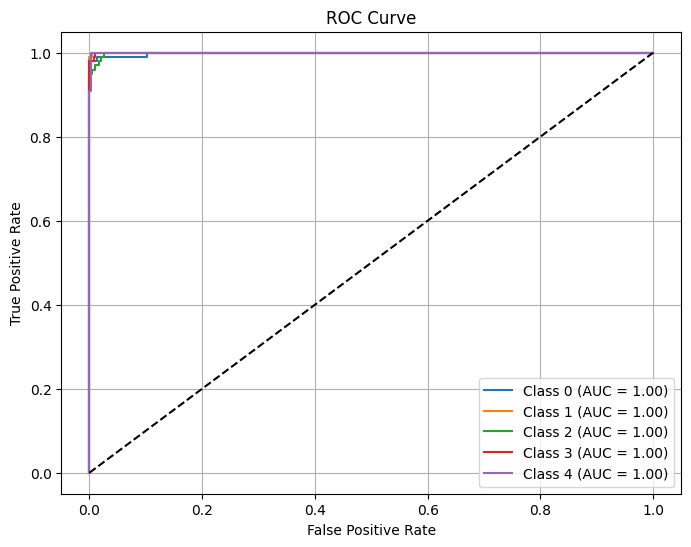

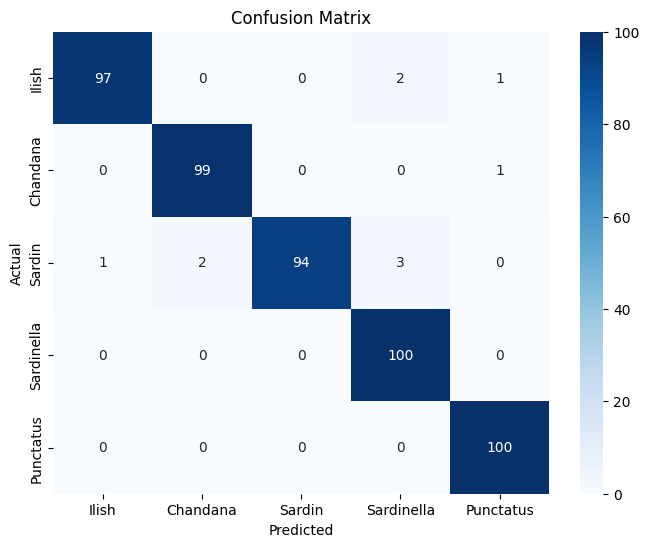

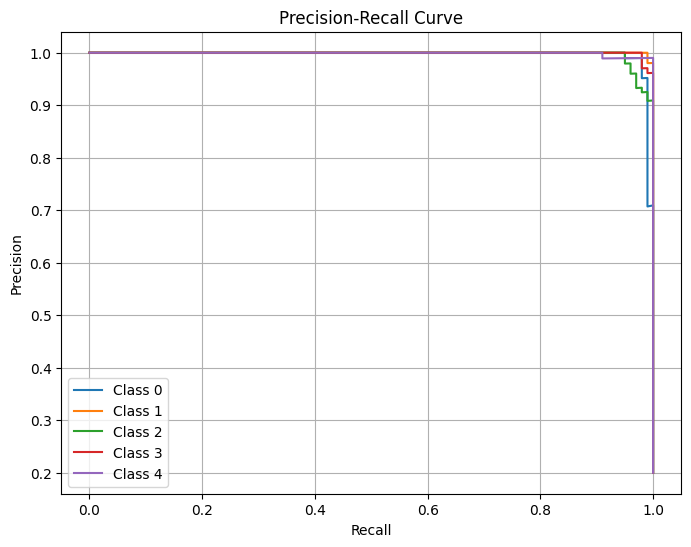

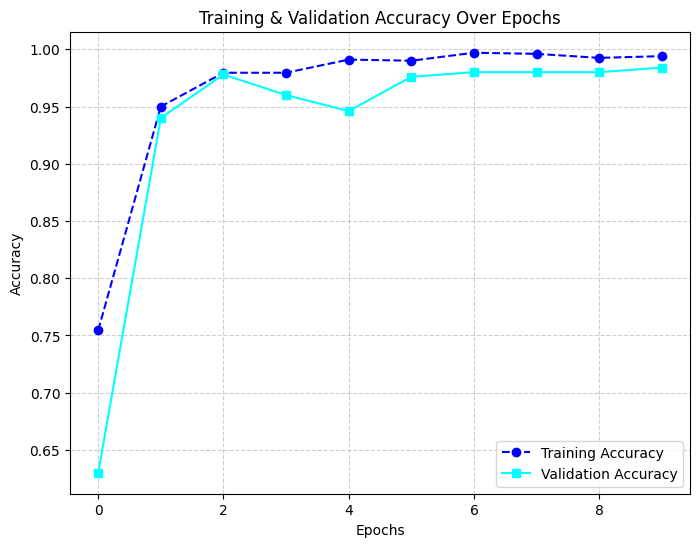

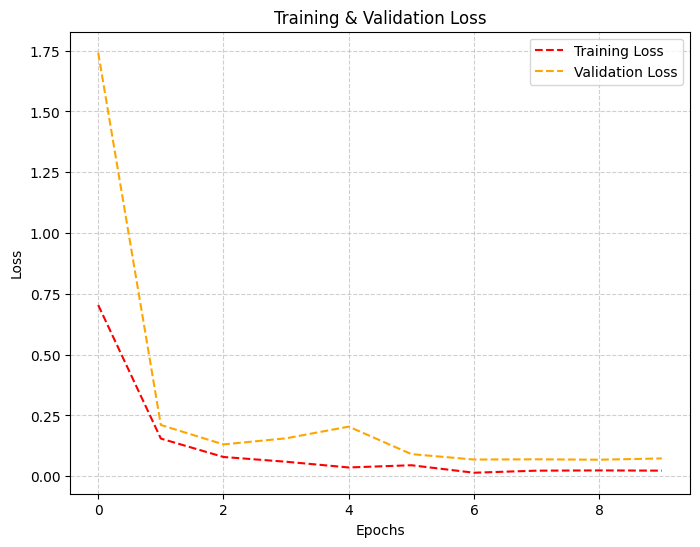

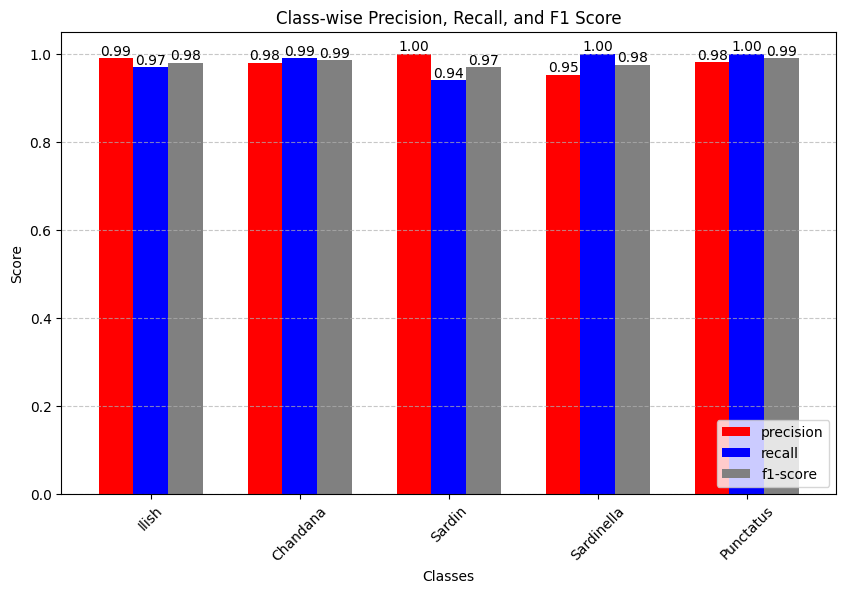


Final Model Performance:
Test Accuracy: 0.9800
F1 Score: 0.9799
Final predictions evaluated.


In [ ]:
!pip install imbalanced-learn

# Data Processing and Model Evaluation
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, classification_report
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter



# Assuming X and Y are your image data and labels
# X: image data (e.g., shape=(n_samples, height, width, channels)), Y: labels (0,1,2,3,4 for the 5 classes)

# Split original dataset into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Flatten the image data (from 4D to 2D)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE on training data only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_reshaped, Y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Reshape back to original 3D shape for the ResNet50 model
# Reshape X_train_resampled and X_test to have the shape (n_samples, 224, 224, 3)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)


# X_train_resampled = X_train_resampled / 255.0  # Normalize train data
# X_test = X_test / 255.0  # Normalize test data



print(f"Shape of X_train_resampled: {X_train_resampled.shape}")  # Check the new shape
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")  # Check the new shape









# Model Training
# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)














# Train Model
history = model.fit(X_train_resampled, Y_train_resampled,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)





# Rest of your evaluation code...

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

model.save('model_resnet.keras')

#Single Transfer Model Trianing

#CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model...
Epoch 1/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7087 - loss: 1.0063
Epoch 1: val_loss improved from inf to 3.71845, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.7093 - loss: 1.0037 - val_accuracy: 0.3023 - val_loss: 3.7185 - learning_rate: 1.0000e-04
Epoch 2/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8966 - loss: 0.3215
Epoch 2: val_loss improved from 3.71845 to 1.11397, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8967 - loss: 0.3212 - val_accuracy: 0.6631 - val_loss: 1.1140 - learning_rate: 1.0000e-04
Epoch 3/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9491 - loss: 0.1588
Epoch 3: val_loss improved from 1.11397 to 0.19062, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9492 - loss: 0.1587 - val_accuracy: 0.9398 - val_loss: 0.1906 - learning_rate: 1.0000e-04
Epoch 4/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9758 - loss: 0.0773
Epoch 4: val_loss did not improve from 0.19062
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9758 - loss: 0.0774 - val_accuracy: 0.9182 - val_loss: 0.2804 - learning_rate: 1.0000e-04
Epoch 5/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9833 - loss: 0.0557
Epoch 5: val_loss did not improve from 0.19062
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9284 - val_loss: 0.2379 - learning_rate: 1.0000e-04
Epoch 6/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9908 - loss: 0.0313
Epoch 6: val_loss improved from 0.19062 to 0.18022, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9908 - loss: 0.0313 - val_accuracy: 0.9432 - val_loss: 0.1802 - learning_rate: 1.0000e-04
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9913 - loss: 0.0292
Epoch 7: val_loss did not improve from 0.18022
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.9449 - val_loss: 0.1920 - learning_rate: 1.0000e-04
Epoch 8/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9951 - loss: 0.0217
Epoch 8: val_loss did not improve from 0.18022
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9951 - loss: 0.0217 - val_accuracy: 0.9540 - val_loss: 0.1802 - learning_rate: 1.0000e-04
Epoch 9/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9947 - loss: 0.0189
Epoch 9: val_loss did not improve from 0.18022
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9948 - loss: 0.0189 - val_accuracy: 0.9358 - val_loss: 0.1981 - learning_rate: 1.0000e-04
Epoch 10/1

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9625 - val_loss: 0.1340 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


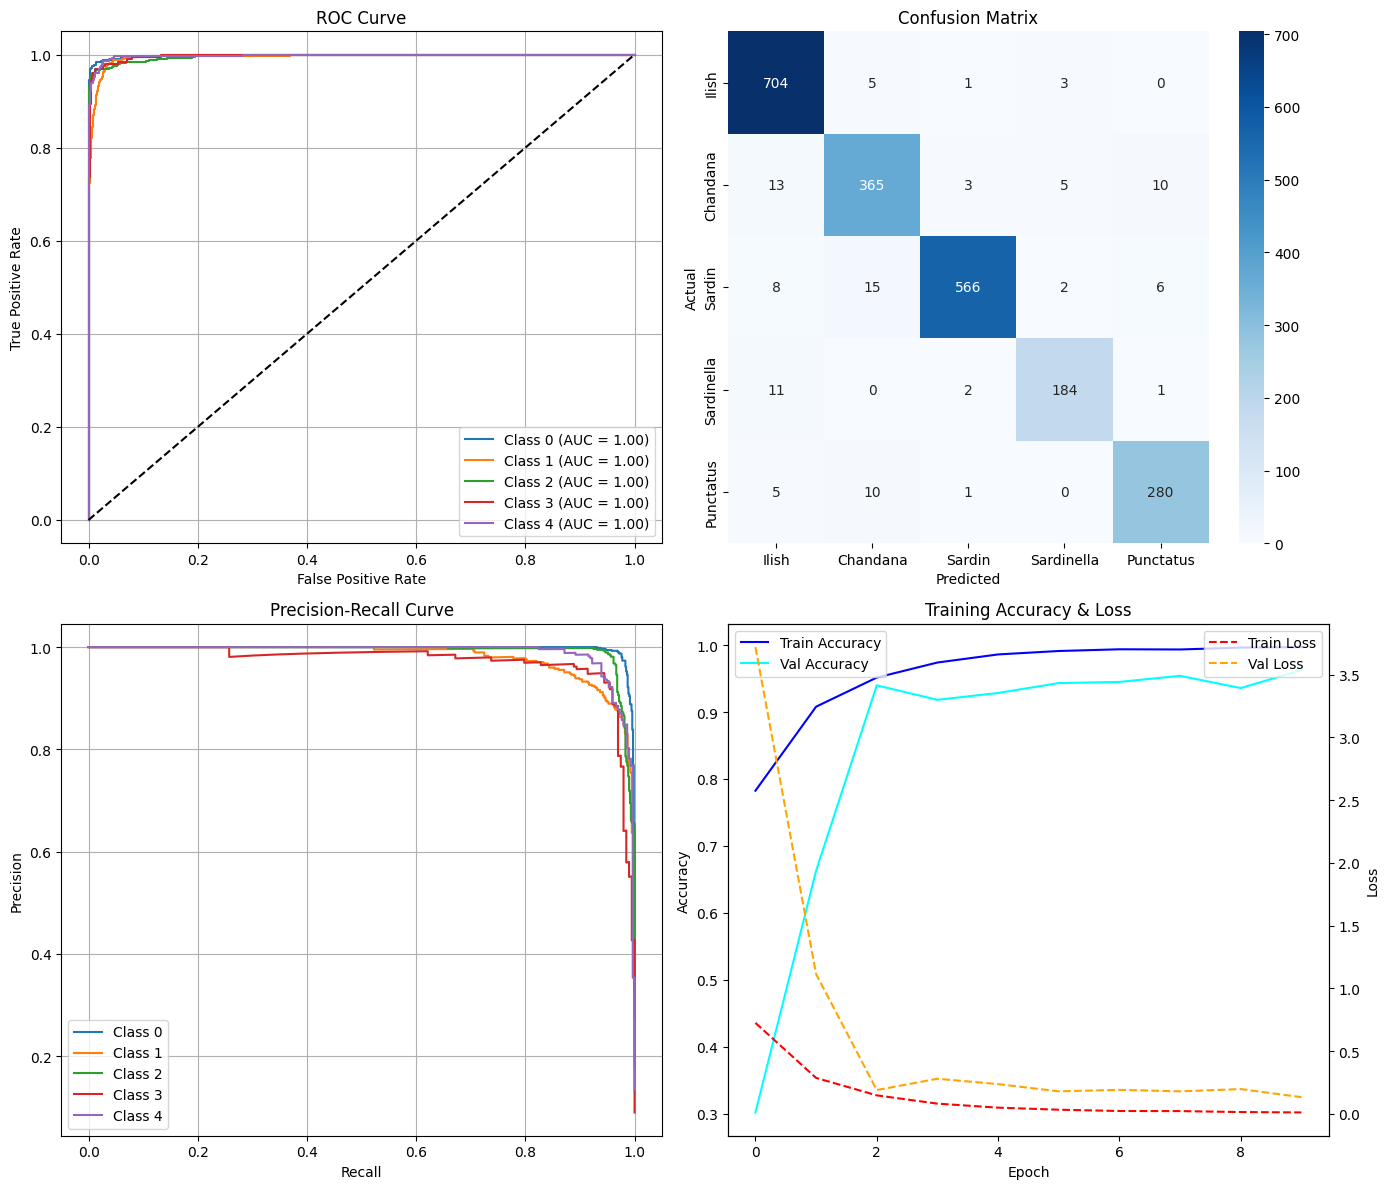


Final Model Performance:
Test Accuracy: 0.9541
F1 Score: 0.9541
Final predictions evaluated.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']


# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)  # Adjusted patience
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a base CNN model
def create_base_cnn_model(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Ensure dataset variables exist
# (You need to define X_train_scaled, X_test_scaled, Y_train, Y_test before running)

# Create the CNN model
cnn_model = create_base_cnn_model()

# Train the model
print("Training CNN model...")
history_cnn = cnn_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Generate predictions
cnn_preds_prob = cnn_model.predict(X_test_scaled)
cnn_preds = np.argmax(cnn_preds_prob, axis=1)

# Visualization function
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history, class_labels):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # ROC Curve
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        axes[0, 0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    axes[0, 0].plot([0, 1], [0, 1], 'k--')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axes[0, 1])
    axes[0, 1].set_title('Confusion Matrix')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Actual')

    # Precision-Recall Curve
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        axes[1, 0].plot(recall, precision, label=f'Class {i}')
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Training Accuracy & Loss Curves
    ax2 = axes[1, 1].twinx()
    axes[1, 1].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    axes[1, 1].plot(history.history['val_accuracy'], label='Val Accuracy', color='cyan')
    ax2.plot(history.history['loss'], label='Train Loss', linestyle='dashed', color='red')
    ax2.plot(history.history['val_loss'], label='Val Loss', linestyle='dashed', color='orange')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')
    axes[1, 1].set_title('Training Accuracy & Loss')
    axes[1, 1].legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, cnn_preds, cnn_preds_prob, history_cnn, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, cnn_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, cnn_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

#ResNet50

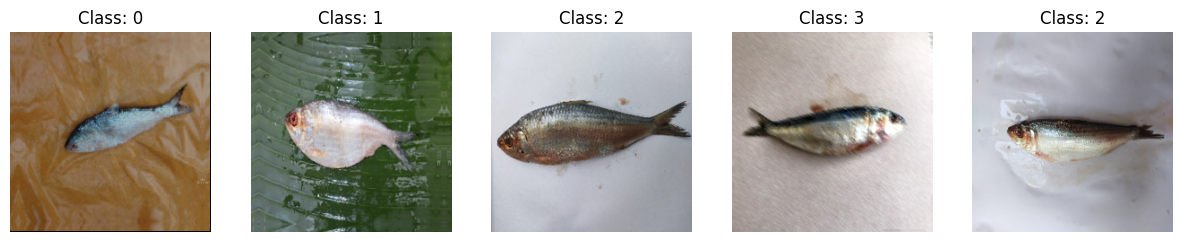

Original class distribution: Counter({np.int64(0): 2000, np.int64(2): 1600, np.int64(1): 1200, np.int64(3): 400, np.int64(4): 400})
Resampled class distribution: Counter({np.int64(0): 2000, np.int64(1): 2000, np.int64(2): 2000, np.int64(3): 2000, np.int64(4): 2000})
Training Fold 1/10
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 132s 396ms/step - accuracy: 0.7224 - loss: 0.7646 - val_accuracy: 0.8609 - val_loss: 0.4418 - learning_rate: 0.0010
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 379ms/step - accuracy: 0.8975 - loss: 0.3083 - val_accuracy: 0.9274 - val_loss: 0.2154 - learning_rate: 0.0010
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 106s 377ms/step - accuracy: 0.9264 - loss: 0.2166 - val_accuracy: 0.9395 - val_loss: 0.1921 - learning_rate: 0.0010
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 105s 376ms/step - accuracy: 0.9374 - loss: 0.1827 - val_accuracy: 0.9349 - val_loss: 0.2244 - learning_rate: 0.0010
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 104s 372ms/step - accuracy: 0.9420 - loss: 0.1735 - val_accuracy: 0.9597 - val_loss: 0.1045 - learning_rate: 0.0010
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 96s 342ms/step - accuracy: 0.9532 - loss: 0.1370 - val_accuracy: 0.9545 - val_loss: 0.1239 - learning_rate: 0.0010
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 96s 343ms/step - accuracy

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming X and Y are already loaded and preprocessed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)

import matplotlib.pyplot as plt
import numpy as np

# Display some sample images from the resampled dataset
num_samples_to_show = 5  # Number of sample images to display
fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 5))

# Plot the images
for i in range(num_samples_to_show):
    axes[i].imshow(X_train_resampled[i])  # Display the image
    axes[i].set_title(f"Class: {Y_train_resampled[i]}")  # Set the class as the title
    axes[i].axis('off')  # Hide the axis

plt.show()
print(f"Original class distribution: {Counter(Y_train)}")
print(f"Resampled class distribution: {Counter(Y_train_resampled)}")


# Parameters
input_shape = (224, 224, 3)
num_classes = 5
batch_size = 32
epochs = 5
k_folds = 10

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def batch_generator(X, Y, batch_size=32):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            end = min(start + batch_size, size)
            batch_idx = indices[start:end]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, to_categorical(Y_batch, num_classes)


# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]


def create_resnet_model(input_shape=(224, 224, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_with_kfold(X_train, Y_train, X_test, Y_test, k=10, batch_size=32, epochs=10):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = []
    ensemble_predictions = np.zeros((X_test.shape[0], num_classes))

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
        print(f"Training Fold {fold_no}/{k}")

        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

        resnet_model = create_resnet_model()
        train_generator = batch_generator(X_train_fold, Y_train_fold, batch_size)
        val_generator = batch_generator(X_val_fold, Y_val_fold, batch_size)

        callbacks = [
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
            ModelCheckpoint(f'best_model_resnet_fold_{fold_no}.keras', save_best_only=True, monitor='val_loss', mode='min'),
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        ]

        history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1,
                                   callbacks=callbacks, steps_per_epoch=len(X_train_fold)//batch_size,
                                   validation_steps=len(X_val_fold)//batch_size)
        histories.append(history)

        resnet_preds = resnet_model.predict(X_test)
        ensemble_predictions += resnet_preds

    ensemble_predictions /= k
    final_classes = np.argmax(ensemble_predictions, axis=1)
    accuracy = np.mean(final_classes == Y_test)
    print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
    return final_classes, histories

final_predictions, history_dict = train_with_kfold(X_train_resampled, Y_train_resampled, X_test, Y_test, k=k_folds)
print("Training Complete. ResNet Model is ready!")






import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Function to plot ROC curve
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels, fold_no):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - Fold {fold_no}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels, fold_no):
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {fold_no}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels, fold_no):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'{class_labels[i]}')
    plt.title(f'Precision-Recall Curve - Fold {fold_no}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Training & Validation Accuracy over epochs
def plot_accuracy(history_list):
    plt.figure(figsize=(8, 6))
    for i, history in enumerate(history_list):
        plt.plot(history.history['accuracy'], label=f'Fold {i+1} Training', linestyle='dashed', marker='o')
        plt.plot(history.history['val_accuracy'], label=f'Fold {i+1} Validation', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Training & Validation Loss over epochs
def plot_loss(history_list):
    plt.figure(figsize=(8, 6))
    for i, history in enumerate(history_list):
        plt.plot(history.history['loss'], label=f'Fold {i+1} Training Loss', linestyle='dashed', color='red')
        plt.plot(history.history['val_loss'], label=f'Fold {i+1} Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Function to display classification report
def print_classification_report(Y_test, Y_test_pred, class_labels, fold_no):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels)
    print(f"Classification Report - Fold {fold_no}:\n", report)

# Function to compare class-wise metrics
def plot_classwise_metrics(Y_test, Y_test_pred, prev_Y_test_pred=None):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Current model class-wise metrics
    plt.figure(figsize=(10, 6))
    df_report.plot(kind='bar', width=0.7, color=[colors[col] for col in df_report.columns])
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black')
    plt.title('Current Model Class-wise Metrics')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    # Previous model class-wise metrics (if available)
    if prev_Y_test_pred is not None:
        prev_report = classification_report(Y_test, prev_Y_test_pred, target_names=class_labels, output_dict=True)
        prev_df_report = pd.DataFrame(prev_report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]

        plt.figure(figsize=(10, 6))
        prev_df_report.plot(kind='bar', width=0.7, color=['pink', 'lightblue', 'lightgray'])
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                               ha='center', va='bottom', fontsize=10, color='black')
        plt.title('Previous Model Class-wise Metrics')
        plt.xlabel('Classes')
        plt.ylabel('Score')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()
        plt.show()

# Generate all individual plots for each fold
for fold_no, history in enumerate(history_dict, 1):
    print(f"\nEvaluating Fold {fold_no}:")

    # Get predictions for the current fold (final_predictions for this fold)
    fold_predictions = history.model.predict(X_test)  # or use history if separate fold predictions are stored
    plot_roc_curve(Y_test, fold_predictions, class_labels, fold_no)
    plot_confusion_matrix(Y_test, np.argmax(fold_predictions, axis=1), class_labels, fold_no)
    plot_precision_recall_curve(Y_test, fold_predictions, class_labels, fold_no)
    print_classification_report(Y_test, np.argmax(fold_predictions, axis=1), class_labels, fold_no)
    plot_classwise_metrics(Y_test, np.argmax(fold_predictions, axis=1))  # Class-wise metrics for the current fold

# Plot overall accuracy and loss trends across all folds
plot_accuracy(history_dict)
plot_loss(history_dict)

# Print final accuracy and F1 score across all folds
final_accuracy = np.mean([accuracy_score(Y_test, np.argmax(fold.model.predict(X_test), axis=1)) for fold in history_dict])
final_f1 = np.mean([f1_score(Y_test, np.argmax(fold.model.predict(X_test), axis=1), average='weighted') for fold in history_dict])

print("\nFinal Model Performance (Averaged across all folds):")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

#EfficientNetB0

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from tensorflow.keras.applications import ResNet50,EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming X and Y are already loaded and preprocessed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)

import matplotlib.pyplot as plt
import numpy as np

# Display some sample images from the resampled dataset
num_samples_to_show = 5  # Number of sample images to display
fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 5))

# Plot the images
for i in range(num_samples_to_show):
    axes[i].imshow(X_train_resampled[i])  # Display the image
    axes[i].set_title(f"Class: {Y_train_resampled[i]}")  # Set the class as the title
    axes[i].axis('off')  # Hide the axis

plt.show()
print(f"Original class distribution: {Counter(Y_train)}")
print(f"Resampled class distribution: {Counter(Y_train_resampled)}")


# Parameters
input_shape = (224, 224, 3)
num_classes = 5
batch_size = 32
epochs = 5
k_folds = 10

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def batch_generator(X, Y, batch_size=32):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            end = min(start + batch_size, size)
            batch_idx = indices[start:end]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, to_categorical(Y_batch, num_classes)


# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]


def create_resnet_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_with_kfold(X_train, Y_train, X_test, Y_test, k=10, batch_size=32, epochs=10):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = []
    ensemble_predictions = np.zeros((X_test.shape[0], num_classes))

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
        print(f"Training Fold {fold_no}/{k}")

        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

        resnet_model = create_resnet_model()
        train_generator = batch_generator(X_train_fold, Y_train_fold, batch_size)
        val_generator = batch_generator(X_val_fold, Y_val_fold, batch_size)

        callbacks = [
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
            ModelCheckpoint(f'best_model_resnet_fold_{fold_no}.keras', save_best_only=True, monitor='val_loss', mode='min'),
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        ]

        history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=epochs, verbose=1,
                                   callbacks=callbacks, steps_per_epoch=len(X_train_fold)//batch_size,
                                   validation_steps=len(X_val_fold)//batch_size)
        histories.append(history)

        resnet_preds = resnet_model.predict(X_test)
        ensemble_predictions += resnet_preds

    ensemble_predictions /= k
    final_classes = np.argmax(ensemble_predictions, axis=1)
    accuracy = np.mean(final_classes == Y_test)
    print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
    return final_classes, histories

final_predictions, history_dict = train_with_kfold(X_train_resampled, Y_train_resampled, X_test, Y_test, k=k_folds)
print("Training Complete. ResNet Model is ready!")






import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Function to plot ROC curve
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels, fold_no):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - Fold {fold_no}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels, fold_no):
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {fold_no}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels, fold_no):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'{class_labels[i]}')
    plt.title(f'Precision-Recall Curve - Fold {fold_no}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Training & Validation Accuracy over epochs
def plot_accuracy(history_list):
    plt.figure(figsize=(8, 6))
    for i, history in enumerate(history_list):
        plt.plot(history.history['accuracy'], label=f'Fold {i+1} Training', linestyle='dashed', marker='o')
        plt.plot(history.history['val_accuracy'], label=f'Fold {i+1} Validation', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Training & Validation Loss over epochs
def plot_loss(history_list):
    plt.figure(figsize=(8, 6))
    for i, history in enumerate(history_list):
        plt.plot(history.history['loss'], label=f'Fold {i+1} Training Loss', linestyle='dashed', color='red')
        plt.plot(history.history['val_loss'], label=f'Fold {i+1} Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Function to display classification report
def print_classification_report(Y_test, Y_test_pred, class_labels, fold_no):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels)
    print(f"Classification Report - Fold {fold_no}:\n", report)

# Function to compare class-wise metrics
def plot_classwise_metrics(Y_test, Y_test_pred, prev_Y_test_pred=None):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Current model class-wise metrics
    plt.figure(figsize=(10, 6))
    df_report.plot(kind='bar', width=0.7, color=[colors[col] for col in df_report.columns])
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black')
    plt.title('Current Model Class-wise Metrics')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    # Previous model class-wise metrics (if available)
    if prev_Y_test_pred is not None:
        prev_report = classification_report(Y_test, prev_Y_test_pred, target_names=class_labels, output_dict=True)
        prev_df_report = pd.DataFrame(prev_report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]

        plt.figure(figsize=(10, 6))
        prev_df_report.plot(kind='bar', width=0.7, color=['pink', 'lightblue', 'lightgray'])
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                               ha='center', va='bottom', fontsize=10, color='black')
        plt.title('Previous Model Class-wise Metrics')
        plt.xlabel('Classes')
        plt.ylabel('Score')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()
        plt.show()

# Generate all individual plots for each fold
for fold_no, history in enumerate(history_dict, 1):
    print(f"\nEvaluating Fold {fold_no}:")

    # Get predictions for the current fold (final_predictions for this fold)
    fold_predictions = history.model.predict(X_test)  # or use history if separate fold predictions are stored
    plot_roc_curve(Y_test, fold_predictions, class_labels, fold_no)
    plot_confusion_matrix(Y_test, np.argmax(fold_predictions, axis=1), class_labels, fold_no)
    plot_precision_recall_curve(Y_test, fold_predictions, class_labels, fold_no)
    print_classification_report(Y_test, np.argmax(fold_predictions, axis=1), class_labels, fold_no)
    plot_classwise_metrics(Y_test, np.argmax(fold_predictions, axis=1))  # Class-wise metrics for the current fold

# Plot overall accuracy and loss trends across all folds
plot_accuracy(history_dict)
plot_loss(history_dict)

# Print final accuracy and F1 score across all folds
final_accuracy = np.mean([accuracy_score(Y_test, np.argmax(fold.model.predict(X_test), axis=1)) for fold in history_dict])
final_f1 = np.mean([f1_score(Y_test, np.argmax(fold.model.predict(X_test), axis=1), average='weighted') for fold in history_dict])

print("\nFinal Model Performance (Averaged across all folds):")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

#InceptionV3

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7387 - loss: 0.7286
Epoch 1: val_loss improved from inf to 0.11232, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 123s 144ms/step - accuracy: 0.7392 - loss: 0.7272 - val_accuracy: 0.9636 - val_loss: 0.1123 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9701 - loss: 0.0883
Epoch 2: val_loss improved from 0.11232 to 0.05392, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9701 - loss: 0.0883 - val_accuracy: 0.9832 - val_loss: 0.0539 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9864 - loss: 0.0412
Epoch 3: val_loss improved from 0.05392 to 0.03985, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9855 - val_loss: 0.0398 - learning_rate: 1.0000e-04
Epoch 4/1

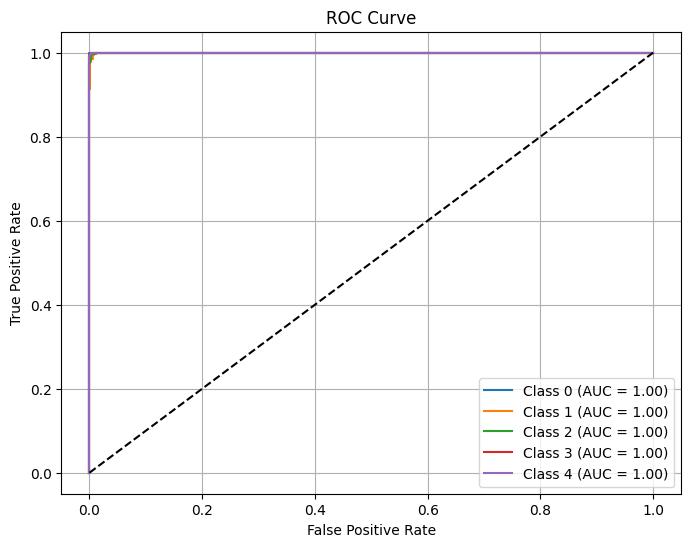

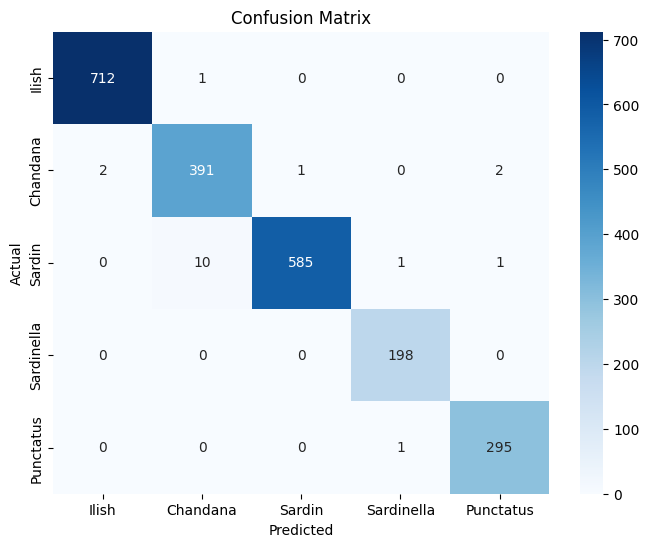

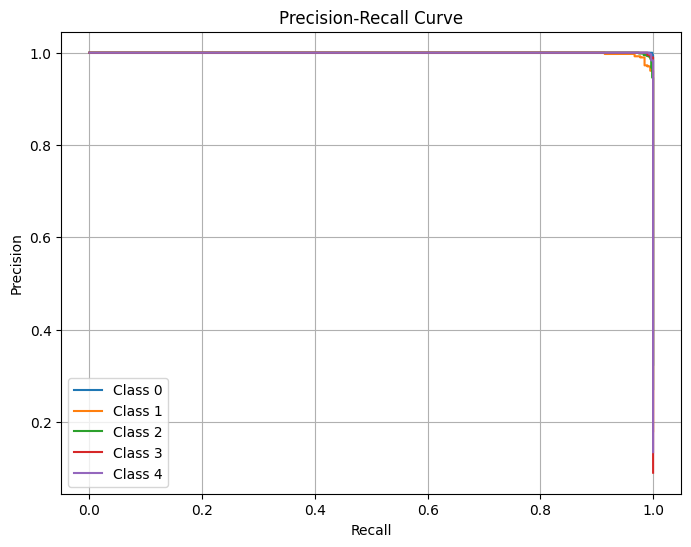

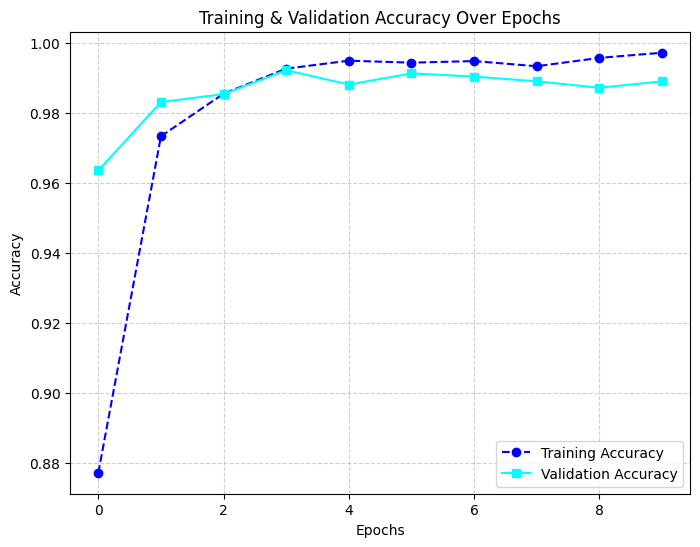

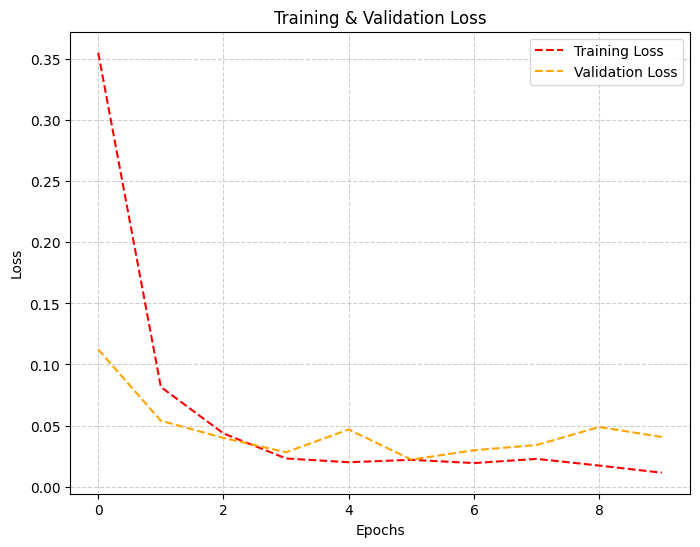

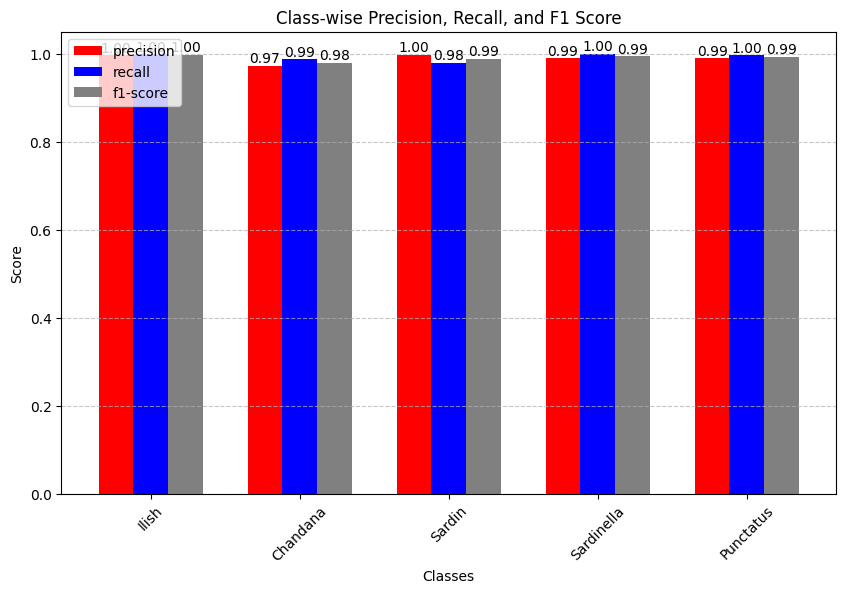


Final Model Performance:
Test Accuracy: 0.9914
F1 Score: 0.9914
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#MobileNetV2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6957 - loss: 0.8698
Epoch 1: val_loss improved from inf to 2.53476, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.6963 - loss: 0.8682 - val_accuracy: 0.4705 - val_loss: 2.5348 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9681 - loss: 0.0940
Epoch 2: val_loss improved from 2.53476 to 0.68906, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9681 - loss: 0.0939 - val_accuracy: 0.7755 - val_loss: 0.6891 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9778 - loss: 0.0621
Epoch 3: val_loss improved from 0.68906 to 0.16901, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9778 - loss: 0.0620 - val_accuracy: 0.9377 - val_loss: 0.1690 - learning_rate: 1.0000e-04
Epoch 4/10
27

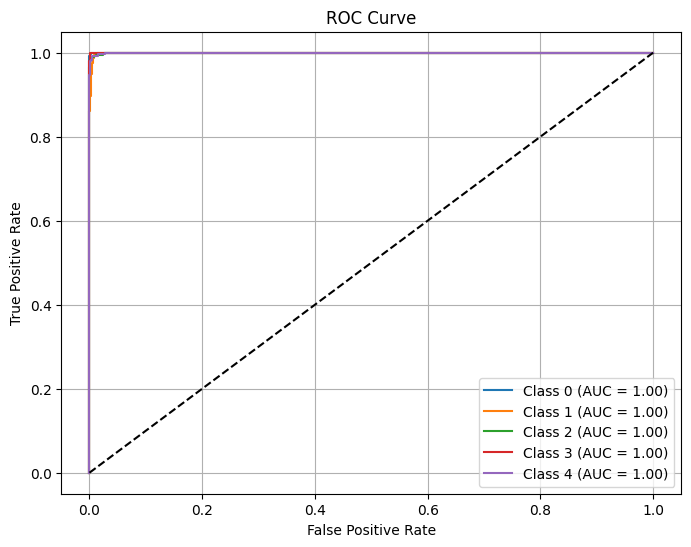

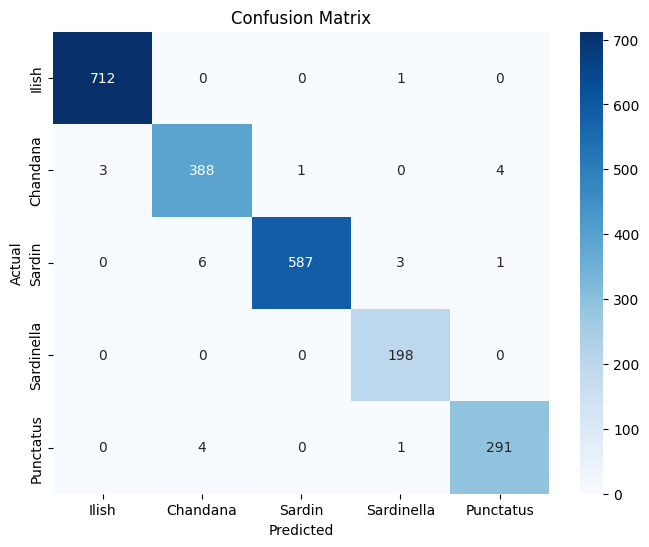

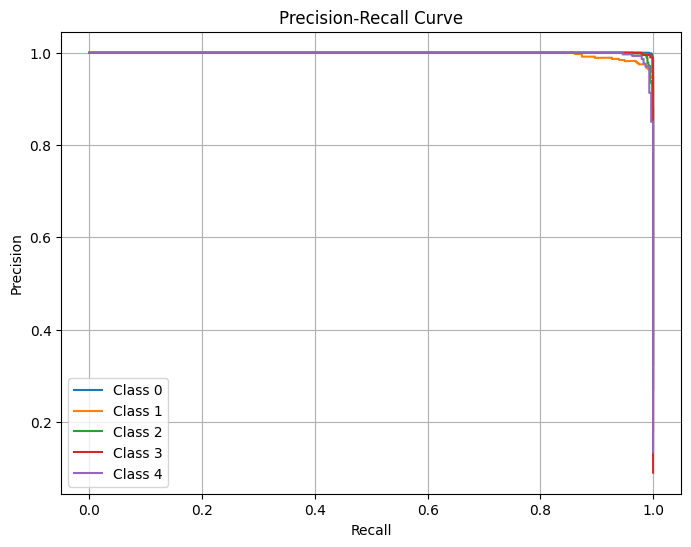

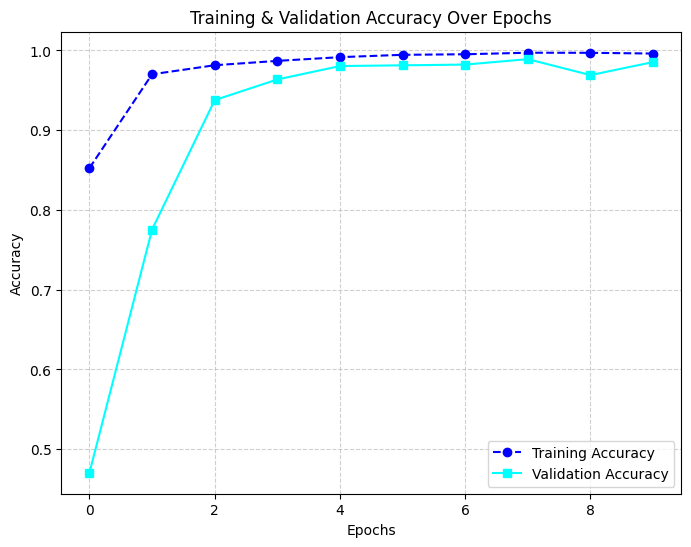

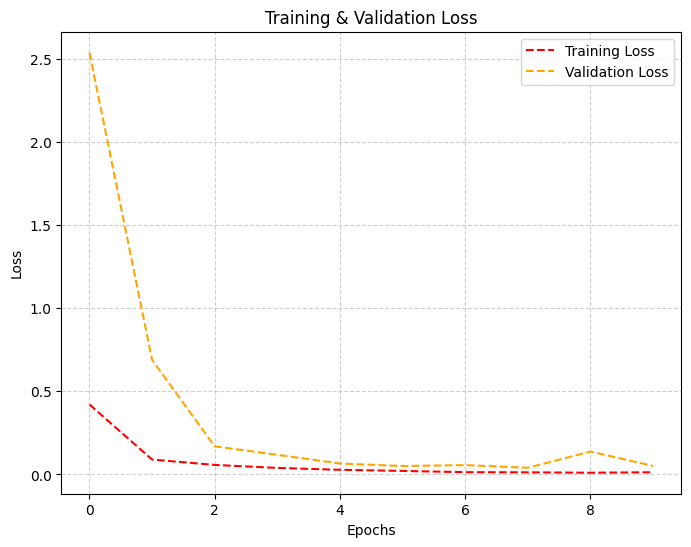

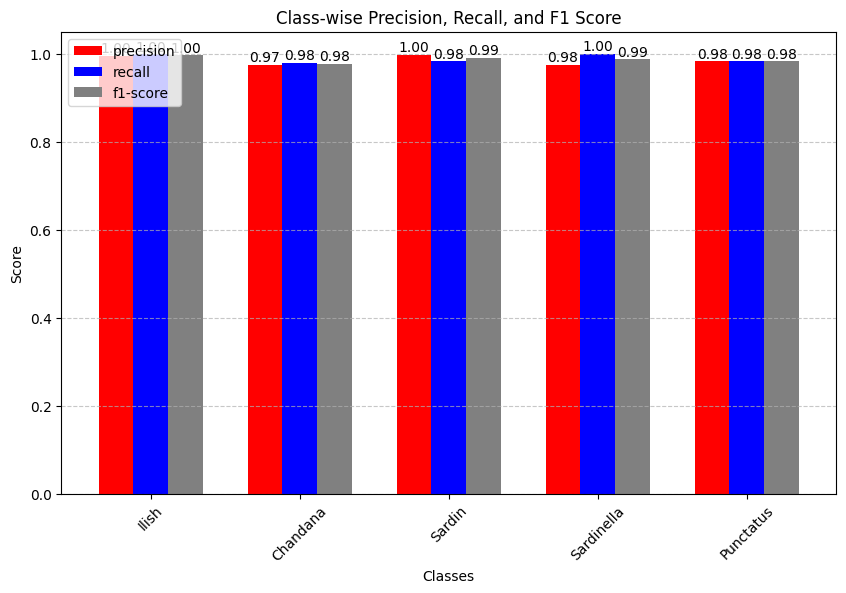


Final Model Performance:
Test Accuracy: 0.9891
F1 Score: 0.9891
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#VGG-19

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5926 - loss: 1.1512
Epoch 1: val_loss improved from inf to 1.45339, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 140s 374ms/step - accuracy: 0.5932 - loss: 1.1496 - val_accuracy: 0.6395 - val_loss: 1.4534 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9245 - loss: 0.2497
Epoch 2: val_loss improved from 1.45339 to 0.85835, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9246 - loss: 0.2496 - val_accuracy: 0.7586 - val_loss: 0.8584 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9645 - loss: 0.1218
Epoch 3: val_loss improved from 0.85835 to 0.21431, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9645 - loss: 0.1218 - val_accuracy: 0.9318 - val_loss: 0.2143 - learning_rate: 1.0000e-04
Epoc

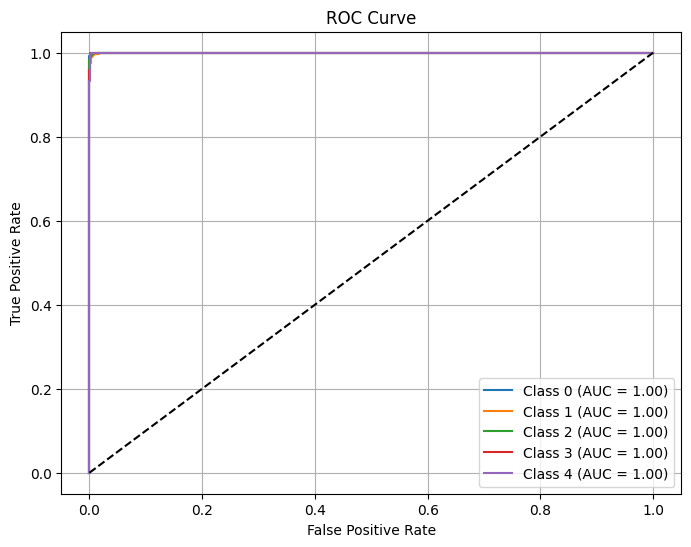

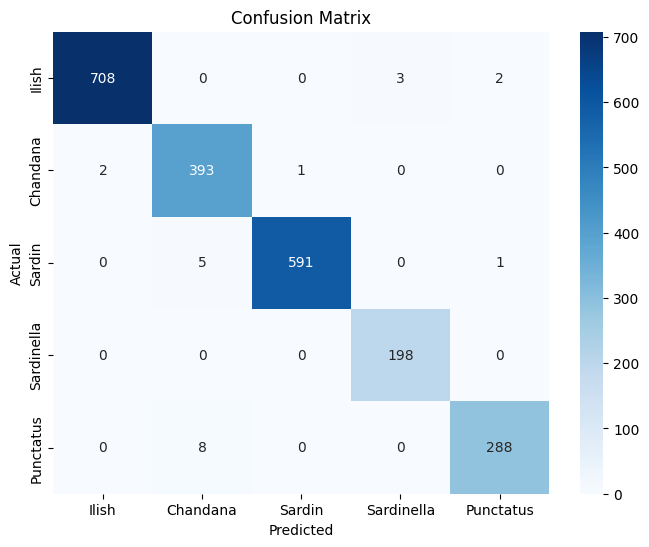

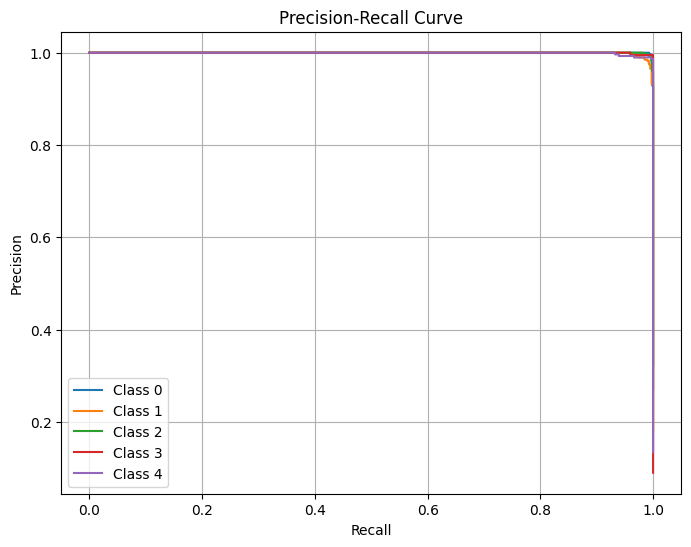

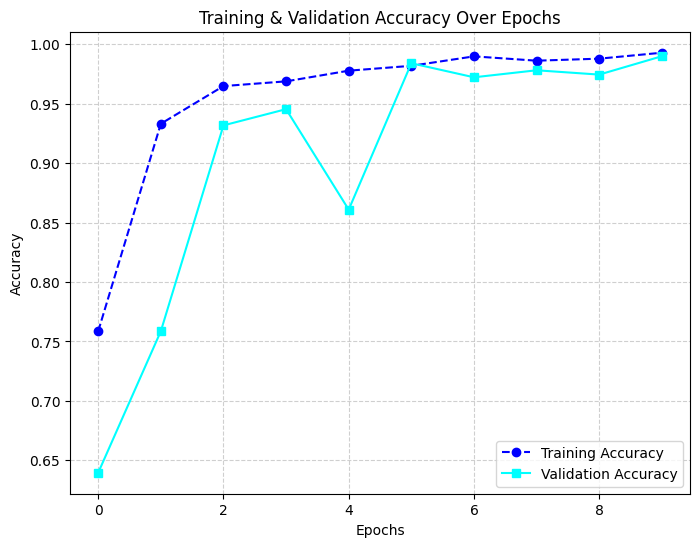

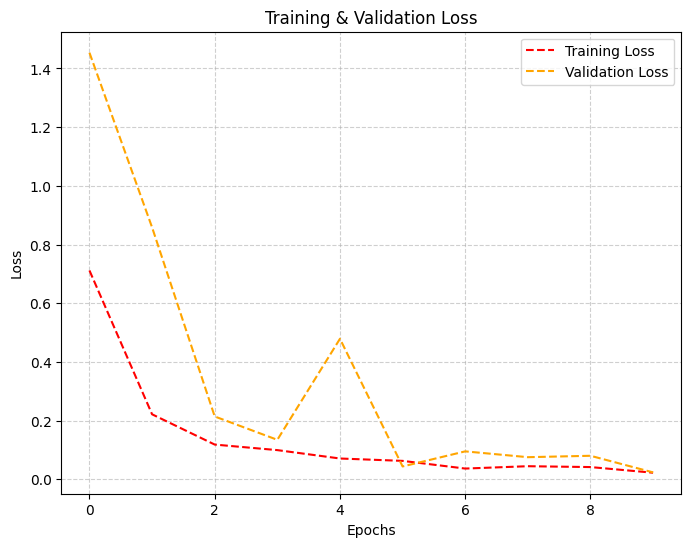

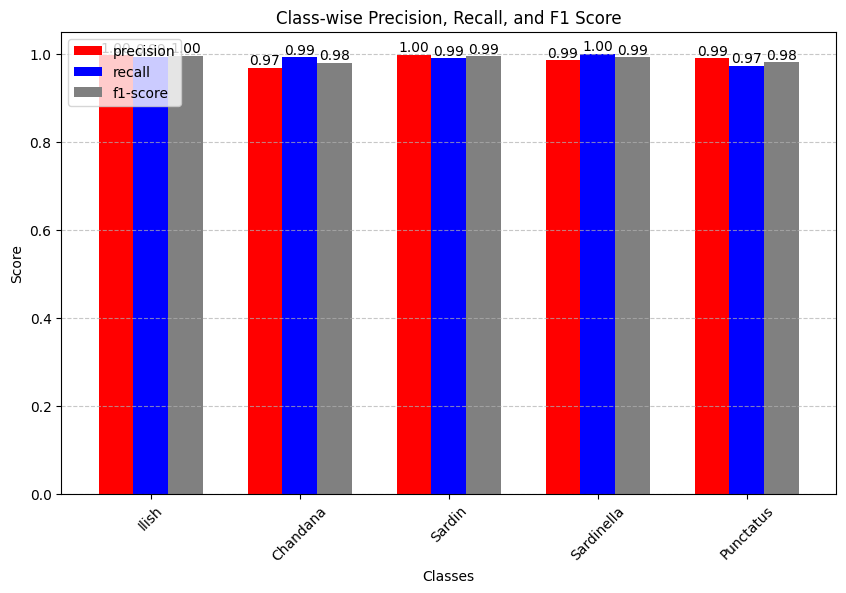


Final Model Performance:
Test Accuracy: 0.9900
F1 Score: 0.9900
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

In [ ]:
# model.save('efficientnetb0.h5')

#End